In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
%matplotlib inline

In [2]:
dados = pd.read_csv("dados_SP_modelo.csv", sep=',', low_memory=False)
dados

,Unnamed: 0,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,0,2020-02-26,1,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
1,1,2020-02-27,2,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
2,2,2020-02-28,3,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
3,3,2020-02-29,4,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
4,4,2020-03-01,5,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,8536,2020-05-07,18,5,3542008,Quintana,Quintana-SP,0,2,0,0,6638,30.10000,0.00000,-22.07300,-50.30800,Tropical,meridiano 50 a 60,N,N,Interior,0.73200,Menor de 10 mil,9,Marília,37,Tupã,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000
8791,8535,2020-05-07,40,5,3550407,São Pedro,São Pedro-SP,9,36,0,0,35653,101.00000,0.00000,-22.54900,-47.91400,Tropical,meridiano 40 a 50,N,N,Interior,0.75500,Maior de 10 mil,6,Piracicaba,28,Piracicaba,12,4,4,2,0,0,22,20,36,8,2,0,0,66,0.53000
8792,8534,2020-05-07,21,5,3503109,Arandu,Arandu-SP,0,10,0,2,6357,157.30000,314.60000,-23.13400,-49.05400,Tropical,meridiano 40 a 50,N,N,Interior,0.68500,Menor de 10 mil,4,Bauru,22,Avaré,0,0,0,0,0,0,0,3,5,4,0,0,0,12,0.53000
8793,8543,2020-05-07,36,5,3500501,Águas de Lindóia,Águas de Lindóia-SP,0,4,0,1,18705,21.40000,53.50000,-22.47600,-46.63300,Tropical,meridiano 40 a 50,N,N,Interior,0.74500,Maior de 10 mil,7,Campinas,33,Amparo,1,7,2,2,0,0,12,3,15,6,6,0,0,30,0.53000


# 1. Feature Engineering

In [3]:
dados2 = dados.drop(columns=['Unnamed: 0', 'cod7d', 'cidade', 'casos_diários', 'mortes_diárias',
                             'casos_por_100mil_hab', 'mortes_por_milhão_hab',
                             'Microrregião Geográfica', 'Nome_Microrregião', 'Mesorregião Geográfica',
                             'Total_Não_SUS', 'Total_SUS'])
dados2

,data,dias_epidemiológicos,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,2020-05-07,18,5,Quintana-SP,2,0,6638,-22.07300,-50.30800,Tropical,meridiano 50 a 60,N,N,Interior,0.73200,Menor de 10 mil,Marília,0,0,0,0,0,0,0,0,0,0,0,0,0.53000
8791,2020-05-07,40,5,São Pedro-SP,36,0,35653,-22.54900,-47.91400,Tropical,meridiano 40 a 50,N,N,Interior,0.75500,Maior de 10 mil,Piracicaba,12,4,4,2,0,0,20,36,8,2,0,0,0.53000
8792,2020-05-07,21,5,Arandu-SP,10,2,6357,-23.13400,-49.05400,Tropical,meridiano 40 a 50,N,N,Interior,0.68500,Menor de 10 mil,Bauru,0,0,0,0,0,0,3,5,4,0,0,0,0.53000
8793,2020-05-07,36,5,Águas de Lindóia-SP,4,1,18705,-22.47600,-46.63300,Tropical,meridiano 40 a 50,N,N,Interior,0.74500,Maior de 10 mil,Campinas,1,7,2,2,0,0,3,15,6,6,0,0,0.53000


Foram excluídas as variáveis cod7d e cidade (ficando apenas com munuf para identificar o município), casos diários e casos por 100 mil habitantes (ficando apenas com casos acumulados), mortes diárias e mortes por milhão de habitantes (ficando apenas com casos acumulados), os totais de leitos SUS e Não SUS, o código da microrregião geográfica e seu nome (pois tem alta correlação com mesorregião geográfica e já temos o município como dado mais granular) e o código da mesorregião geográfica (ficando apenas com o nome da mesorregião).

In [4]:
dados2.isnull().sum()

data                             0
dias_epidemiológicos             0
mês                              0
munuf                            0
casos_acumulados                 0
mortes_acumuladas                0
habitantes                       0
lat                              0
lon                              0
zona geográfica                  0
faixa meridional                 0
capital                          0
litoral                          0
papel                            0
idhm_2010                        0
faixa_pop                        0
Nome_Mesorregião                 0
Cirúrgicos_Não_SUS               0
Clínicos_Não_SUS                 0
Obstétrico_Não_SUS               0
Pediátrico_Não_SUS               0
Outras_Especialidades_Não_SUS    0
Hospital/DIA_Não_SUS             0
Cirúrgicos_SUS                   0
Clínicos_SUS                     0
Obstétrico_SUS                   0
Pediátrico_SUS                   0
Outras_Especialidades_SUS        0
Hospital/DIA_SUS    

In [5]:
dados2.dtypes

data                              object
dias_epidemiológicos               int64
mês                                int64
munuf                             object
casos_acumulados                   int64
mortes_acumuladas                  int64
habitantes                         int64
lat                              float64
lon                              float64
zona geográfica                   object
faixa meridional                  object
capital                           object
litoral                           object
papel                             object
idhm_2010                        float64
faixa_pop                         object
Nome_Mesorregião                  object
Cirúrgicos_Não_SUS                 int64
Clínicos_Não_SUS                   int64
Obstétrico_Não_SUS                 int64
Pediátrico_Não_SUS                 int64
Outras_Especialidades_Não_SUS      int64
Hospital/DIA_Não_SUS               int64
Cirúrgicos_SUS                     int64
Clínicos_SUS    

In [6]:
dados2['data'] = pd.to_datetime(dados2['data'], errors='coerce', infer_datetime_format=True)
dados2.dtypes

data                             datetime64[ns]
dias_epidemiológicos                      int64
mês                                       int64
munuf                                    object
casos_acumulados                          int64
mortes_acumuladas                         int64
habitantes                                int64
lat                                     float64
lon                                     float64
zona geográfica                          object
faixa meridional                         object
capital                                  object
litoral                                  object
papel                                    object
idhm_2010                               float64
faixa_pop                                object
Nome_Mesorregião                         object
Cirúrgicos_Não_SUS                        int64
Clínicos_Não_SUS                          int64
Obstétrico_Não_SUS                        int64
Pediátrico_Não_SUS                      

In [7]:
dados2.nunique()

data                              72
dias_epidemiológicos              72
mês                                4
munuf                            383
casos_acumulados                 406
mortes_acumuladas                110
habitantes                       382
lat                              363
lon                              370
zona geográfica                    2
faixa meridional                   2
capital                            2
litoral                            2
papel                              3
idhm_2010                        129
faixa_pop                          4
Nome_Mesorregião                  15
Cirúrgicos_Não_SUS                76
Clínicos_Não_SUS                  90
Obstétrico_Não_SUS                48
Pediátrico_Não_SUS                46
Outras_Especialidades_Não_SUS     45
Hospital/DIA_Não_SUS              35
Cirúrgicos_SUS                    80
Clínicos_SUS                     117
Obstétrico_SUS                    55
Pediátrico_SUS                    57
O

In [8]:
dados2.head()

,data,dias_epidemiológicos,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000


In [9]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'mês', 'munuf', 'casos_acumulados',
       'mortes_acumuladas', 'habitantes', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento'],
      dtype='object')

## 1.1. Criar dia do ano

In [10]:
dados2['dia_do_ano'] = [n.dayofyear for n in dados2['data']]
colunas = ['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf', 'casos_acumulados',
       'mortes_acumuladas', 'habitantes', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento']
dados2 = dados2.reindex(columns=colunas)
dados2.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000


## 1.2. Criar lags para casos e mortes acumulados

In [11]:
n = 1
radical = 'casos_acumulados_menos'
nome = '{}{}d'.format(radical, n)
while n < 15:
    dados2[nome] = dados2.groupby(['munuf'])['casos_acumulados'].shift(periods=n,axis='index',fill_value=0)
    n = n + 1
    nome = '{}{}d'.format(radical, n)

In [12]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'zona geográfica', 'faixa meridional', 'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d

In [13]:
n = 1
radical = 'mortes_acumuladas_menos'
nome = '{}{}d'.format(radical, n)
while n < 15:
    dados2[nome] = dados2.groupby(['munuf'])['mortes_acumuladas'].shift(periods=n,axis='index',fill_value=0)
    n = n + 1
    nome = '{}{}d'.format(radical, n)

In [14]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'zona geográfica', 'faixa meridional', 'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d

## 1.3. Criar dummies e label encoder para categóricas

In [15]:
dum = pd.get_dummies(dados2, 
                      columns=['zona geográfica','faixa meridional','capital', 'litoral', 'papel', 'faixa_pop'],
                      drop_first=True, 
                      prefix = ['zona geográfica','faixa meridional','capital', 'litoral', 'papel', 'faixa_pop'],
                      prefix_sep='_')
dum.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le_tkt = le.fit_transform(dum['munuf'])
le_tkt_df1 = pd.DataFrame(le_tkt, columns=['LE_munuf'])

le_tkt = le.fit_transform(dum['Nome_Mesorregião'])
le_tkt_df2 = pd.DataFrame(le_tkt, columns=['LE_Nome_Mesorregião'],)

dados_tratados = pd.merge(dum,le_tkt_df1, left_index=True, right_index=True)
dados_tratados = pd.merge(dados_tratados,le_tkt_df2, left_index=True, right_index=True)

dados_tratados.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9


In [17]:
dados_tratados.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'idhm_2010', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d', 'casos_acumulados_menos14d',
       'mortes_acumuladas_menos1d', 'mortes_acumuladas_men

In [18]:
dados_sel = dados_tratados[['dias_epidemiológicos', 'dia_do_ano', 'mês',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'idhm_2010', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d', 'casos_acumulados_menos14d',
       'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d',
       'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d',
       'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d',
       'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d',
       'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d',
       'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d',
       'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d',
       'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60',
       'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana',
       'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil',
       'faixa_pop_Menor de 10 mil', 'LE_munuf', 'LE_Nome_Mesorregião']]

In [19]:
dados_sel.head()

,dias_epidemiológicos,dia_do_ano,mês,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,1,0,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9


## 1.4. Baseline e Validação

Vamos estabelecer que a base para comparação da previsão serão os casos e mortes do dia anterior. Ou seja, se prevíssemos que os casos e mortes de hoje serão iguais aos casos e mortes do dia anterior, o quanto estaríamos errando? O objetivo do modelo será superar esse erro médio.

#### Métricas para avaliar o modelo

Para analisar se as previsões estão com os valores próximos dos dados reais deve-se fazer a medição do erro, o erro (ou resíduo) neste caso é basicamente Yreal − Yprev.

Avalia-se o erro nos dados de treino para verificar se o modelo tem boa assertividade, e valida-se o modelo verificando o erro nos dados de teste (dados que não foram “vistos” pelo modelo).

Abaixo estão as principais métricas usadas para avaliar modelos de séries temporais:

##### Mean Forecast Error — (Erro Médio da Previsão ou Viés)

O erro médio da previsão nada mais é do que a média dos erros da série avaliada, os valores podem ser positivos ou negativos. Essa métrica sugere que o modelo tende a fazer previsões acima do real (erros negativos) ou abaixo do real (erros positivos), desse modo também pode-se dizer que o erro médio é o viés do modelo.

##### MAE — Mean Absolute Error — (Erro Médio Absoluto)

Essa métrica é muito semelhante ao erro médio da previsão mencionado acima, a única diferença é o erro com valor negativo, ou seja, a previsão com valor maior que o número real, é transformado em positivo e posteriormente a média é calculada.

Essa métrica é muito usada em séries temporais, pois há casos que o erro negativo pode zerar o positivo ou dar uma ideia que o modelo é preciso. No caso do MAE isso não acontece, pois essa métrica mostra o quanto a previsão está longe dos valores reais, independente se acima ou abaixo.

##### MSE — Mean Squared Error — (Erro Quadrático Médio)

Essa métrica coloca mais peso nos erros maiores, pois cada valor individual do erro é elevado ao quadrado e posteriormente a média desses valores é calculada. Assim, essa métrica é muito sensível à outliers e coloca bastante peso nas previsões com erros mais significativos.

Diferente do MAE e MFE, os valores do MSE estão em unidades quadráticas e não na unidade do modelo.

##### RMSE — Root Mean Squared Error — (Erro Quadrático Médio da Raiz)

Essa métrica é simplesmente a raiz quadrada do MSE, onde o erro volta a ter a unidade de medida do modelo. É muito usada em séries temporais porque é mais sensível à erros maiores devido ao processo de elevação ao quadrado que a originou.

##### MAPE — Mean Absolute Percentage Error — (Erro Percentual Médio Absoluto)

Essa é outra métrica interessante de ser usada, pois o erro é medido em termos percentuais e pode-se comparar o erro percentual do modelo de um objeto X com o erro percentual de um objeto Y. O cálculo dessa métrica pega o valor absoluto do erro dividido pelo resultado real e posteriormente é calculada a média.

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def check_erro(orig, prev, nome_col='', nome_indice=''):
    
    vies = np.mean(orig - prev)
    mse = mean_squared_error(orig, prev)
    rmse = sqrt(mean_squared_error(orig, prev))
    mae = mean_absolute_error(orig, prev)
    mape = np.mean(np.abs((orig - prev) / orig)) * 100
    
    grupo_erro = [vies, mse, rmse, mae, mape]
    serie = pd.DataFrame(grupo_erro, index=['VIÉS','MSE','RMSE','MAE', 'MAPE'], columns=[nome_col])
    serie.index.name = nome_indice
    
    return serie

### 1.4.1. Casos Acumulados

In [21]:
df_casos = dados_tratados[['data', 'casos_acumulados', 'casos_acumulados_menos1d']].copy()

In [22]:
df_casos.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real', 'casos_acumulados_menos1d': 'previsão'}
df_casos.rename(columns=colunas, inplace=True)
#df_casos = df_casos.iloc[1:]
df_casos

,real,previsão
data,,
2020-02-26,1,0
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
...,...,...
2020-05-07,2,2
2020-05-07,36,27
2020-05-07,10,10


In [23]:
check_erro(df_casos['real'].values, df_casos['previsão'], nome_col='Baseline', nome_indice='Base Completa')

,Baseline
Base Completa,
VIÉS,4.54008
MSE,2534.63900
RMSE,50.34520
MAE,4.65810
MAPE,11.77102


In [24]:
def plotar_erro(df, figsize=(18,8)):
    
    # Criando a coluna do erro
    df['Erro'] = df.iloc[:,0] - df.iloc[:,1]
    
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotando os valores reais e previstos
    ax1.plot(df.iloc[:,0:2])
    ax1.legend(['Real','Prev'])
    ax1.set_title('Valores Previstos vs Resíduo')
    
    # Erro vs Valores previstos
    ax2.scatter(df.iloc[:,1], df.iloc[:,2])
    ax2.set_xlabel('Valores Previstos')
    ax2.set_ylabel('Resíduo')
    ax2.set_title('Resíduo vs Valores Previstos')
    
    ## QQ Plot do erro
    sm.graphics.qqplot(df.iloc[:,2], line='r', ax=ax3)
    
    # Gráfico de autocorrelação do Erro
    plot_acf(df.iloc[:,2], lags=60,zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

C:\Users\gusta\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


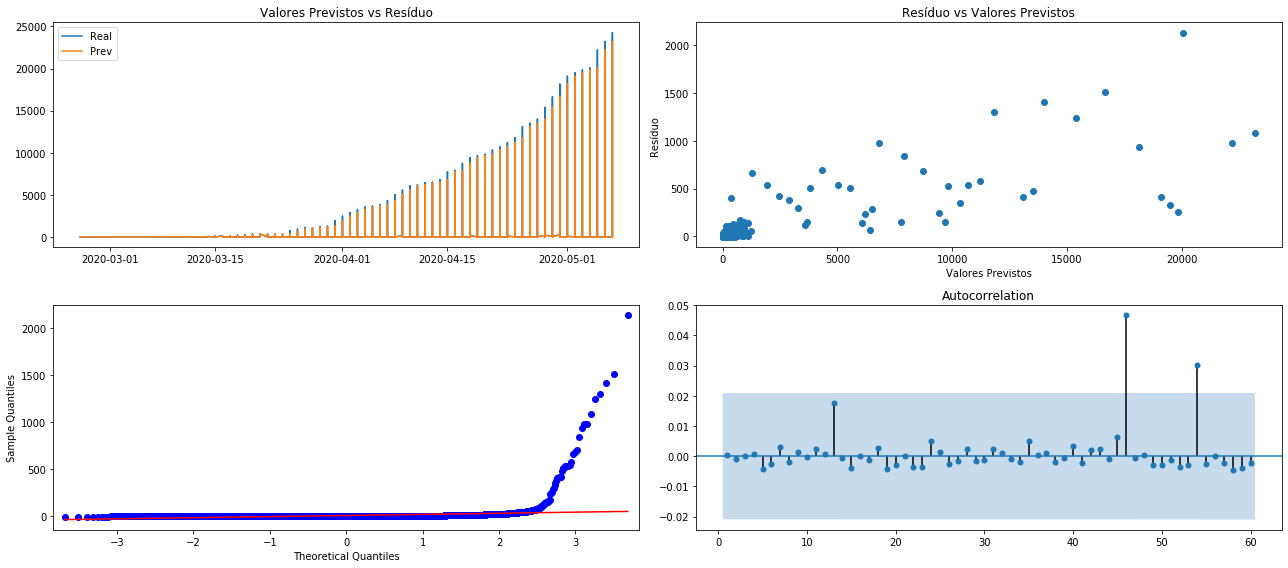

In [25]:
plotar_erro(df_casos)

### 1.4.2. Mortes Acumuladas

In [26]:
df_mortes = dados_tratados[['data', 'mortes_acumuladas', 'mortes_acumuladas_menos1d']].copy()

In [27]:
df_mortes.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real', 'mortes_acumuladas_menos1d': 'previsão'}
df_mortes.rename(columns=colunas, inplace=True)
#df_mortes = df_mortes.iloc[1:]
df_mortes

,real,previsão
data,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


In [28]:
check_erro(df_mortes['real'].values, df_mortes['previsão'], nome_col='Baseline', nome_indice='Base Completa')

,Baseline
Base Completa,
VIÉS,0.36453
MSE,21.03945
RMSE,4.58688
MAE,0.38204
MAPE,9.12069


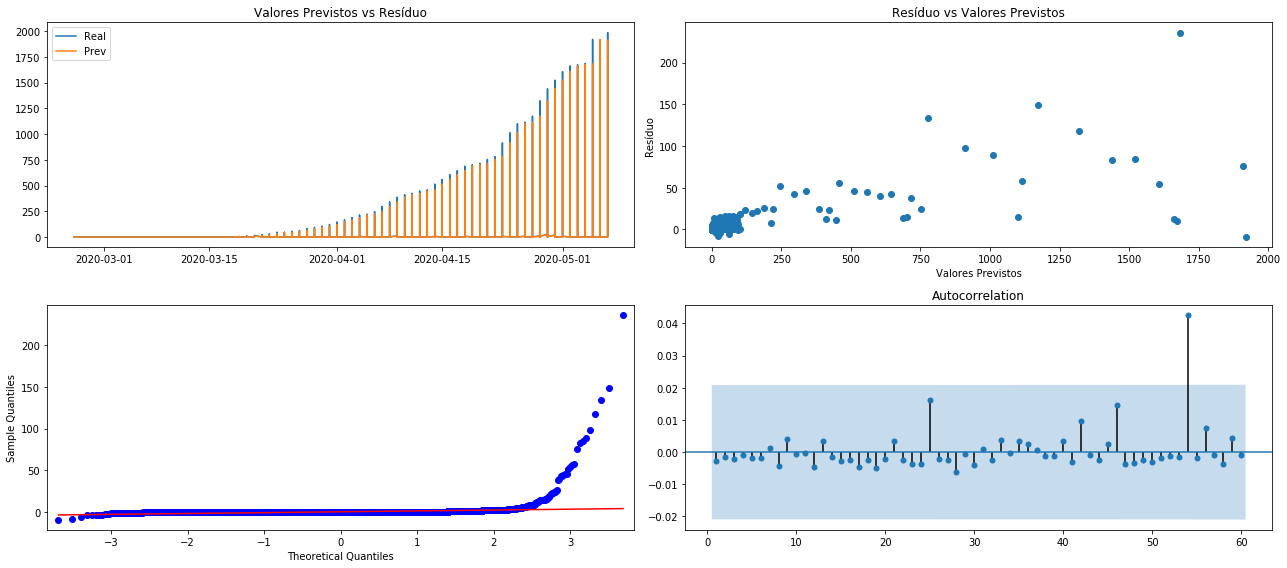

In [29]:
plotar_erro(df_mortes)

## 1.5. Separação da base em variáveis explicativas, target casos acumulados e target mortes acumuladas

In [30]:
pd.set_option('display.max_rows', 20)

In [31]:
explicativas = dados_sel.drop(columns=['casos_acumulados', 'mortes_acumuladas'])

In [32]:
explicativas.dtypes

dias_epidemiológicos            int64
dia_do_ano                      int64
mês                             int64
habitantes                      int64
lat                           float64
                               ...   
faixa_pop_Maior de 100 mil      uint8
faixa_pop_Maior de 50 mil       uint8
faixa_pop_Menor de 10 mil       uint8
LE_munuf                        int32
LE_Nome_Mesorregião             int32
Length: 59, dtype: object

In [33]:
target_casos = dados_sel['casos_acumulados']
target_mortes = dados_sel['mortes_acumuladas']

## 1.6. Normalização das variáveis explicativas

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
expl_norm = explicativas.astype(float).copy()

In [36]:
cols = expl_norm.columns.tolist()

In [37]:
scaler = MinMaxScaler(feature_range=(0,1))
expl_norm = scaler.fit_transform(expl_norm)

In [38]:
expl_norm = pd.DataFrame(expl_norm, columns=cols)

In [39]:
expl_norm

,dias_epidemiológicos,dia_do_ano,mês,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,0.00000,0.00000,0.00000,1.00000,0.28986,0.70320,0.74439,1.00000,1.00000,1.00000,0.98075,1.00000,1.00000,1.00000,0.67269,0.99459,0.99456,1.00000,1.00000,0.56000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.88743,0.64286
1,0.01408,0.01408,0.00000,1.00000,0.28986,0.70320,0.74439,1.00000,1.00000,1.00000,0.98075,1.00000,1.00000,1.00000,0.67269,0.99459,0.99456,1.00000,1.00000,0.56000,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.88743,0.64286
2,0.02817,0.02817,0.00000,1.00000,0.28986,0.70320,0.74439,1.00000,1.00000,1.00000,0.98075,1.00000,1.00000,1.00000,0.67269,0.99459,0.99456,1.00000,1.00000,0.56000,0.00004,0.00005,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.88743,0.64286
3,0.04225,0.04225,0.00000,1.00000,0.28986,0.70320,0.74439,1.00000,1.00000,1.00000,0.98075,1.00000,1.00000,1.00000,0.67269,0.99459,0.99456,1.00000,1.00000,0.56000,0.00004,0.00005,0.00005,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.88743,0.64286
4,0.05634,0.05634,0.33333,1.00000,0.28986,0.70320,0.74439,0.96525,0.98631,0.96536,0.98396,0.72451,0.96148,1.00000,1.00000,0.99613,0.99845,1.00000,1.00000,0.56000,0.00004,0.00005,0.00005,0.00005,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.88743,0.64286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,0.23944,1.00000,1.00000,0.00045,0.58131,0.23200,0.41704,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,

## 1.7. Modificação da distribuição das targets

Como a distribuição das targets está muito concentrada no zero, vamos aplicar uma função logarítmica para melhorar a performance do modelo.

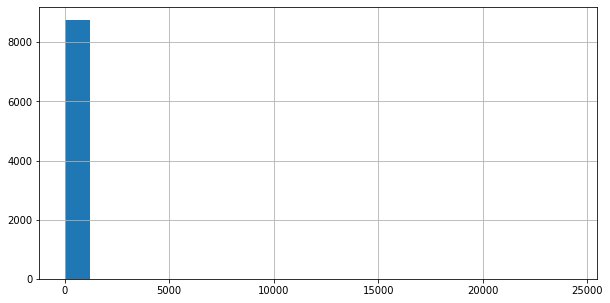

In [40]:
target_casos.hist(bins=20, figsize=(10,5))

In [41]:
target_casos_log = np.log1p(target_casos)

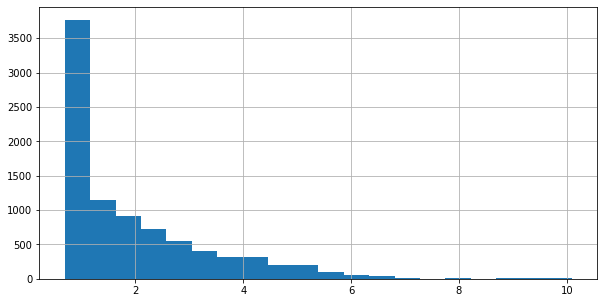

In [42]:
target_casos_log.hist(bins=20, figsize=(10,5))

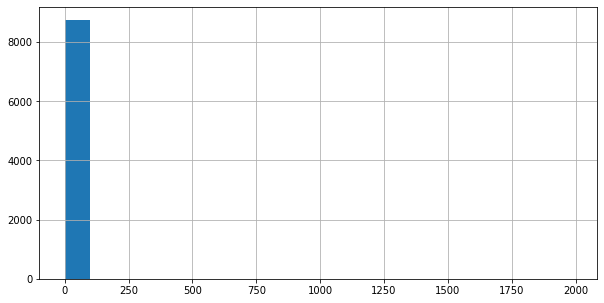

In [43]:
target_mortes.hist(bins=20, figsize=(10,5))

In [44]:
target_mortes_log = np.log1p(target_mortes)

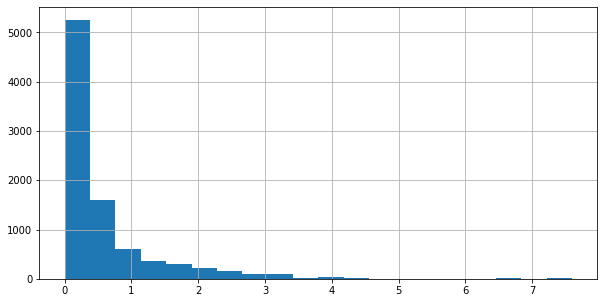

In [45]:
target_mortes_log.hist(bins=20, figsize=(10,5))

## 1.8. Seleção de Variáveis

### 1.8.1. Seleção baseada em filtro

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### 1.8.1.1. Casos acumulados

In [47]:
chi_selector1 = SelectKBest(chi2, k=30)
chi_selector1.fit(expl_norm, target_casos)
chi_support1 = chi_selector1.get_support()
chi_feature1 = expl_norm.loc[:,chi_support1].columns.tolist()
print(str(len(chi_feature1)), 'é o numero de variáveis selecionadas')
print(chi_feature1)

30 é o numero de variáveis selecionadas
['Hospital/DIA_SUS', 'casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d', 'capital_S']


#### 1.8.1.2. Mortes acumuladas

In [48]:
chi_selector2 = SelectKBest(chi2, k=30)
chi_selector2.fit(expl_norm, target_mortes)
chi_support2 = chi_selector2.get_support()
chi_feature2 = expl_norm.loc[:,chi_support2].columns.tolist()
print(str(len(chi_feature2)), 'é o numero de variáveis selecionadas')
print(chi_feature2)

30 é o numero de variáveis selecionadas
['Hospital/DIA_SUS', 'casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d', 'capital_S']


### 1.8.2. Seleção baseada em wrapper

In [49]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

#### 1.8.2.1. Casos acumulados

In [50]:
rfecv_selector1 = RFECV(estimator=LinearRegression(), step=10)
rfecv_selector1.fit(expl_norm, target_casos_log)
rfecv_support1 = rfecv_selector1.get_support()
rfecv_feature1 = expl_norm.loc[:,rfecv_support1].columns.tolist()
print(str(len(rfecv_feature1)), 'é o numero de variáveis selecionadas')
print(rfecv_feature1)

39 é o numero de variáveis selecionadas
['dias_epidemiológicos', 'habitantes', 'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Hospital/DIA_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS', 'Hospital/DIA_SUS', 'casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos8d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d', 'capital_S', 

#### 1.8.2.2. Mortes acumuladas

In [51]:
rfecv_selector2 = RFECV(estimator=LinearRegression(), step=10)
rfecv_selector2.fit(expl_norm, target_mortes_log)
rfecv_support2 = rfecv_selector2.get_support()
rfecv_feature2 = expl_norm.loc[:,rfecv_support2].columns.tolist()
print(str(len(rfecv_feature2)), 'é o numero de variáveis selecionadas')
print(rfecv_feature2)

1 é o numero de variáveis selecionadas
['mortes_acumuladas_menos1d']


### 1.8.3. Seleção baseada em método embarcado

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

#### 1.8.3.1. Casos acumulados

In [53]:
rf_selector1 = SelectFromModel(RandomForestRegressor(n_estimators=300, random_state=14))
rf_selector1.fit(explicativas, target_casos)
rf_support1 = rf_selector1.get_support()
rf_feature1 = explicativas.loc[:,rf_support1].columns.tolist()
print(str(len(rf_feature1)), 'é o numero de variáveis selecionadas')
print(rf_feature1)

28 é o numero de variáveis selecionadas
['casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d']


#### 1.8.3.2. Mortes acumuladas

In [54]:
rf_selector2 = SelectFromModel(RandomForestRegressor(n_estimators=300, random_state=14))
rf_selector2.fit(explicativas, target_mortes)
rf_support2 = rf_selector2.get_support()
rf_feature2 = explicativas.loc[:,rf_support2].columns.tolist()
print(str(len(rf_feature2)), 'é o numero de variáveis selecionadas')
print(rf_feature2)

28 é o numero de variáveis selecionadas
['casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d']


### 1.8.4. Comparação dos diferentes métodos de seleção de variáveis

#### 1.8.4.1. Casos acumulados

In [55]:
pd.set_option('display.max_rows', None)
feature_selection_df = pd.DataFrame({'Variáveis': explicativas.columns,
                                     'Chi-2':chi_support1, 'RFECV': rfecv_support1, 'RF':rf_support1})

#count
feature_selection_df['Total'] = np.sum(feature_selection_df,axis=1)

#print
feature_selection_df = feature_selection_df.sort_values(['Total','Variáveis'],ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos9d,True,True,True,3
2,mortes_acumuladas_menos8d,True,True,True,3
3,mortes_acumuladas_menos7d,True,True,True,3
4,mortes_acumuladas_menos6d,True,True,True,3
5,mortes_acumuladas_menos5d,True,True,True,3
6,mortes_acumuladas_menos4d,True,True,True,3
7,mortes_acumuladas_menos3d,True,True,True,3
8,mortes_acumuladas_menos2d,True,True,True,3
9,mortes_acumuladas_menos1d,True,True,True,3
10,mortes_acumuladas_menos14d,True,True,True,3


In [56]:
feature_selection_df[feature_selection_df['Total']>0]

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos9d,True,True,True,3
2,mortes_acumuladas_menos8d,True,True,True,3
3,mortes_acumuladas_menos7d,True,True,True,3
4,mortes_acumuladas_menos6d,True,True,True,3
5,mortes_acumuladas_menos5d,True,True,True,3
6,mortes_acumuladas_menos4d,True,True,True,3
7,mortes_acumuladas_menos3d,True,True,True,3
8,mortes_acumuladas_menos2d,True,True,True,3
9,mortes_acumuladas_menos1d,True,True,True,3
10,mortes_acumuladas_menos14d,True,True,True,3


Vamos utilizar as 41 variáveis selecionadas em pelo menos 1 método.

In [57]:
varcasos = feature_selection_df[feature_selection_df['Total']>0]['Variáveis'].to_list()

#### 1.8.4.2. Mortes acumuladas

In [58]:
feature_selection_df2 = pd.DataFrame({'Variáveis': explicativas.columns,
                                     'Chi-2':chi_support2, 'RFECV': rfecv_support2, 'RF':rf_support2})

#count
feature_selection_df2['Total'] = np.sum(feature_selection_df2,axis=1)

#print
feature_selection_df2 = feature_selection_df2.sort_values(['Total','Variáveis'],ascending=False)
feature_selection_df2.index = range(1, len(feature_selection_df2)+1)
feature_selection_df2

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos1d,True,True,True,3
2,mortes_acumuladas_menos9d,True,False,True,2
3,mortes_acumuladas_menos8d,True,False,True,2
4,mortes_acumuladas_menos7d,True,False,True,2
5,mortes_acumuladas_menos6d,True,False,True,2
6,mortes_acumuladas_menos5d,True,False,True,2
7,mortes_acumuladas_menos4d,True,False,True,2
8,mortes_acumuladas_menos3d,True,False,True,2
9,mortes_acumuladas_menos2d,True,False,True,2
10,mortes_acumuladas_menos14d,True,False,True,2


In [59]:
feature_selection_df2[feature_selection_df2['Total']>0]

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos1d,True,True,True,3
2,mortes_acumuladas_menos9d,True,False,True,2
3,mortes_acumuladas_menos8d,True,False,True,2
4,mortes_acumuladas_menos7d,True,False,True,2
5,mortes_acumuladas_menos6d,True,False,True,2
6,mortes_acumuladas_menos5d,True,False,True,2
7,mortes_acumuladas_menos4d,True,False,True,2
8,mortes_acumuladas_menos3d,True,False,True,2
9,mortes_acumuladas_menos2d,True,False,True,2
10,mortes_acumuladas_menos14d,True,False,True,2


Vamos utilizar as 30 variáveis selecionadas em pelo menos 1 método.

In [60]:
varmortes = feature_selection_df2[feature_selection_df2['Total']>0]['Variáveis'].to_list()

In [61]:
pd.set_option('display.max_rows', 20)

# 2. Elaboração de Modelos

Estudando as técnicas de modelagem de séries temporais, selecionamos 2 métodos diferentes:
* No primeiro, fazemos uma previsão em laço, ou seja, analisamos os dados do 1º período para prever o 2º, acrescentamos o 2º período ao 1º para prever o 3º e assim por diante. 
* No segundo, que chamaremos de previsão tradicional, dividiremos a base em teste e treino, sendo que a base teste será composta dos primeiros 80% da base e a base treino será composta dos últimos 20%, em ordem cronológica.

## 2.1. Método de Previsão em Laço

### 2.1.1. Regressão Linear

Como a curva de casos e mortes tende a crescer de forma exponencial, o modelo com regressão linear múltipla pode não dar conta sozinho de explicar as variáveis, pois seu resultado é uma reta. Por isso, vamos adicionar uma etapa para realizar uma regressão polinomial, acrescentado termos elevados a potências, de forma a curvar a reta. 

#### 2.1.1.1. Casos Acumulados

In [62]:
expl_casos = expl_norm[varcasos]

In [63]:
expl_casos

,mortes_acumuladas_menos9d,mortes_acumuladas_menos8d,mortes_acumuladas_menos7d,mortes_acumuladas_menos6d,mortes_acumuladas_menos5d,mortes_acumuladas_menos4d,mortes_acumuladas_menos3d,mortes_acumuladas_menos2d,mortes_acumuladas_menos1d,mortes_acumuladas_menos14d,mortes_acumuladas_menos13d,mortes_acumuladas_menos12d,mortes_acumuladas_menos11d,mortes_acumuladas_menos10d,casos_acumulados_menos8d,casos_acumulados_menos6d,casos_acumulados_menos5d,casos_acumulados_menos4d,casos_acumulados_menos3d,casos_acumulados_menos2d,casos_acumulados_menos1d,casos_acumulados_menos14d,casos_acumulados_menos13d,casos_acumulados_menos12d,casos_acumulados_menos11d,casos_acumulados_menos10d,casos_acumulados_menos9d,casos_acumulados_menos7d,capital_S,Hospital/DIA_SUS,papel_Metropolitana,papel_Interior,habitantes,dias_epidemiológicos,Pediátrico_SUS,Obstétrico_SUS,Obstétrico_Não_SUS,Hospital/DIA_Não_SUS,Clínicos_SUS,Clínicos_Não_SUS,Cirúrgicos_SUS
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.99456,0.99459,1.00000,1.00000,0.67269,1.00000,1.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.01408,0.99456,0.99459,1.00000,1.00000,0.67269,1.00000,1.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00005,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.02817,0.99456,0.99459,1.00000,1.00000,0.67269,1.00000,1.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00005,0.00005,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.04225,0.99456,0.99459,1.00000,1.00000,0.67269,1.00000,1.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00005,0.00005,0.00005,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.05634,0.99845,0.99613,0.96536,0.96148,1.00000,0.98631,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00012,0.00010,0.00010,0.00010,0.00010,0.00009,0.00009,0.00009,0.00008,0.00008,0.00007,0.00007,0.00013,0.00011,0.00000,0.00000,0.00000,1.00000,0.00045,0.23944,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
8791,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00036,0.00126,0.00133,0.00131,0.00130,0.00126,0.00116,0.00009,0.00008,0.00008,0.00007,0.00007,0.00006,0.00094,0.00000,0.00000,0.00000,1.00000,0.00282,0.54930,0.00155,0.00619,0.00375,0.00000,0.00608,0.00075,0.00467
8792,0.00151,0.00139,0.00131,0.00124,0.00120,0.00120,0.00119,0.00104,0.00104,0.00219,0.00198,0.00182,0.00180,0.00171,0.00054,0.00052,0.00051,0.00050,0.00050,0.00045,0.00043,0.00080,0.00076,0.00069,0.00067,0.00064,0.00058,0.00050,0.00000,0.00000,0.00000,1.00000,0.00042,0.28169,0.00000,0.00309,0.00000,0.00000,0.00084,0.00000,0.00070
8793,0.00076,0.00069,0.00066,0.00062,0.00060,0.00060,0.00059,0.00052,0.00052,0.00110,0.00099,0.00091,0.00090,0.00085,0.00024,0.00021,0.00021,0.00020,0.00020,0.00018,0.00017,0.00018,0.00017,0.00015,0.00015,0.00021,0.00032,0.00022,0.00000,0.00000,0.00

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [65]:
df_casos_baseline_lasso = dados_tratados[['dia_do_ano', 'casos_acumulados', 'casos_acumulados_menos1d']].copy()

In [66]:
df_casos_baseline_lasso.set_index('dia_do_ano', inplace=True)
colunas = {'casos_acumulados': 'real', 'casos_acumulados_menos1d': 'previsão'}
df_casos_baseline_lasso.rename(columns=colunas, inplace=True)
df_casos_baseline_lasso

,real,previsão
dia_do_ano,,
57,1,0
58,1,1
59,1,1
60,1,1
61,1,1
...,...,...
128,2,2
128,36,27
128,10,10


In [95]:
dia = 58
n = 3
prev = {}
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_casos[explicativas['dia_do_ano'] < dia]
        val = expl_casos[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_casos_log[explicativas['dia_do_ano'] < dia].values, target_casos_log[explicativas['dia_do_ano'] == dia].values

        poly_model = make_pipeline(PolynomialFeatures(n), LinearRegression())
        poly_model.fit(xtr,ytr)  

        #rfr = RandomForestRegressor(n_estimators=300, random_state=14)
        #rfr.fit(xtr,ytr)

        p = np.expm1(poly_model.predict(xts))
        
        prev.update({dia: p.round(decimals=0)})

        #p = np.expm1(rfr.predict(xts))

        erro_teste['Baseline'] = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                                            df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Regressão Linear ScikitLearn (lasso)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Regressão Linear ScikitLearn (lasso)'].iloc[0],
                                                                                 erro_teste['Regressão Linear ScikitLearn (lasso)'].iloc[1],
                                                                                 erro_teste['Regressão Linear ScikitLearn (lasso)'].iloc[2],
                                                                                 erro_teste['Regressão Linear ScikitLearn (lasso)'].iloc[3],
                                                                                 erro_teste['Regressão Linear ScikitLearn (lasso)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
        train = expl_casos[explicativas['dia_do_ano'] < dia]
        val = expl_casos[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_casos_log[explicativas['dia_do_ano'] < dia].values, target_casos_log[explicativas['dia_do_ano'] == dia].values

        poly_model = make_pipeline(PolynomialFeatures(n), LinearRegression())
        poly_model.fit(xtr,ytr)
        
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

Dia do ano 58 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 59 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 60 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 61 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 62 - Viés 0.09861228866810978, MSE 0.009724383476362612, RMSE 0.09861228866810978, MAE 0.09861228866810978, MAPE 8.97607733731627
Dia do ano 63 - Viés -2.403071818711534, MSE 5.774754165885559, RMSE 2.403071818711534, MAE 2.403071818711534, MAPE 218.7370233792734
Dia do ano 64 - Viés -0.9281002487550059, MSE 0.8613700717391037, RMSE 0.9281002487550059, MAE 0.9281002487550059, MAPE 66.94828131633301
Dia do ano 65 - Viés -1.5036377

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in expm1


* Com regressão linear múltipla sem polinômio, o lasso só conseguiu realizar previsões até o dia 75, com indicadores de erros aumentando gradativamente. Não houve previsões negativas, e o valor máximo de casos previstos foi 8058 (contra 108 casos reais). No dia 76, gerou previsão infinita.
* Com regressão linear múltipla com polinômio elevado ao quadrado, o lasso conseguiu realizar previsões até o dia 79, com indicadores de erros aumentando gradativamente. Houve 1 previsão negativa (-1 caso previsto contra 6 casos reais), e o valor máximo de casos previstos foi 1527516 (contra 259 casos reais). No dia 80, gerou previsão infinita.
* Com regressão linear múltipla com polinômio elevado ao cubo, o lasso conseguiu realizar previsões até o dia 84, com indicadores de erros aumentando exponencialmente. Houve 17 previsões negativas, e o valor máximo de casos previstos foi 5414462067015961600 (contra 366 casos reais).No dia 85, gerou previsão infinita.

In [96]:
r_sq = poly_model.score(xtr,ytr)
print('R²:', r_sq)
n = ytr.shape[0]
k = xtr.shape[1]
ar_sq = 1 - (1 - r_sq)*(n-1)/(n-1-k)
print('R² ajustado:', ar_sq)

R²: 1.0
R² ajustado: 1.0


Sem polinômio:
* R²: 0.9971733153119097
* R² ajustado: 1.0060882439435792

Com polinômio potência 2:
* R²: 1.0
* R² ajustado: 1.0

Com polinômio potência 3:
* R²: 1.0
* R² ajustado: 1.0

In [97]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [98]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred1 = pd.concat([dt,pt], axis=1, join='inner')

In [99]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [100]:
y_pred1 = pd.merge(y_pred1, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred1 = y_pred1.loc[y_pred1['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred1 = y_pred1.astype('int64')

In [101]:
df_casos_teste_lasso = dados_tratados[['data', 'casos_acumulados']][dados_tratados['dia_do_ano'] <= dia].copy()
df_casos_teste_lasso.drop([0], inplace=True)
df_casos_teste_lasso.set_index('data', inplace=True)
df_casos_teste_lasso = pd.concat([df_casos_teste_lasso,y_pred1], axis=1, join='inner')
colunas = {'casos_acumulados': 'real'}
df_casos_teste_lasso.rename(columns=colunas, inplace=True)
df_casos_teste_lasso

,real,previsão
data,,
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
2020-03-02,2,1
...,...,...
2020-03-24,366,-1
2020-03-24,4,4507966
2020-03-24,3,38


Text(0, 0.5, 'previsão')

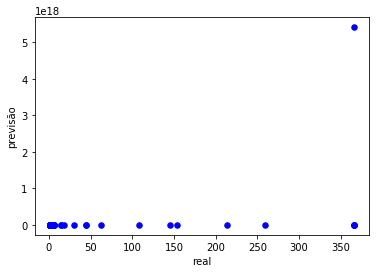

In [102]:
plt.scatter(df_casos_teste_lasso['real'], df_casos_teste_lasso['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [103]:
df_casos_teste_lasso.describe()

,real,previsão
count,194.00000,194.00000
mean,16.54639,27909598283617284.00000
std,64.22024,388735721554034880.00000
min,1.00000,-1.00000
25%,1.00000,1.00000
50%,1.00000,1.00000
75%,2.00000,2.00000
max,366.00000,5414462067015961600.00000


Sem polinômio:
* 	real 	previsão
* count 	33.00000 	33.00000
* mean 	11.51515 	436.96970
* std 	22.92804 	1734.22165
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	1.00000 	2.00000
* 75% 	6.00000 	6.00000
* max 	108.00000 	8058.00000

Com polinômio de potência 2:
* 	real 	previsão
* count 	82.00000 	82.00000
* mean 	14.81707 	24014.60976
* std 	44.57706 	174931.53756
* min 	1.00000 	-1.00000
* 25% 	1.00000 	1.00000
* 50% 	1.00000 	1.00000
* 75% 	2.00000 	3.75000
* max 	259.00000 	1527516.00000

Com polinômio depotência 3:
*  	real 	previsão
* count 	194.00000 	194.00000
* mean 	16.54639 	27909598283617284.00000
* std 	64.22024 	388735721554034880.00000
* min 	1.00000 	-1.00000
* 25% 	1.00000 	1.00000
* 50% 	1.00000 	1.00000
* 75% 	2.00000 	2.00000
* max 	366.00000 	5414462067015961600.00000

In [104]:
df_casos_teste_lasso[df_casos_teste_lasso['previsão'] < 0]

,real,previsão
data,,
2020-03-19,1,-1
2020-03-19,1,-1
2020-03-19,1,-1
2020-03-20,1,-1
2020-03-20,1,-1
2020-03-20,1,-1
2020-03-20,1,-1
2020-03-20,1,-1
2020-03-21,2,-1


Sem polinômio
* sem casos negativos

Com polinômio potência 2:
* 1 negativo (-1 contra 6)

Com polinômio potêncai 3:
* 17 negativos (-1 contra 1, 2, e 366)

In [105]:
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Regressão Linear ScikitLearn (lasso)'] = check_erro(df_casos_teste_lasso['real'],
                                                                df_casos_teste_lasso['previsão'])

In [106]:
erro_teste

,Baseline,Regressão Linear ScikitLearn (lasso)
Base Teste,,
VIÉS,2.05641,-27909598283617280.00000
MSE,110.09744,14395125276719640.00000
RMSE,10.49273,119979686.93375
MAE,2.07692,27909598283617292.00000
MAPE,16.92881,7625573302110736.00000


Indicadores sem polinômio para base de teste:
Baseline |	Regressão Linear ScikitLearn (lasso)
* VIÉS: 3.29412 | -425.45455
* MSE: 84.88235 | 3046010.48485
* RMSE: 9.21316 | 1745.28235
* MAE: 3.29412 | 430.84848
* MAPE: 25.10127 | 761.49328

Indicadores com polinômio com potência 2 para base de teste:
Baseline |	Regressão Linear ScikitLearn (lasso)
* VIÉS: 3.44578 | -23999.79268
* MSE: 120.55422 | 30793810558.69512
* RMSE: 10.97972 | 175481.65305
* MAE: 3.44578 | 24006.20732
* MAPE: 30.48453 | 11066.67157

Indicadores com polinômio com potência 3 para base de teste:
Baseline |	Regressão Linear ScikitLearn (lasso)
* VIÉS: 2.05641 | -27909598283617280.00000
* MSE: 110.09744 | 14395125276719640.00000
* RMSE: 10.49273 | 119979686.93375
* MAE: 2.07692 | 27909598283617292.00000
* MAPE: 16.92881 | 7625573302110736.00000

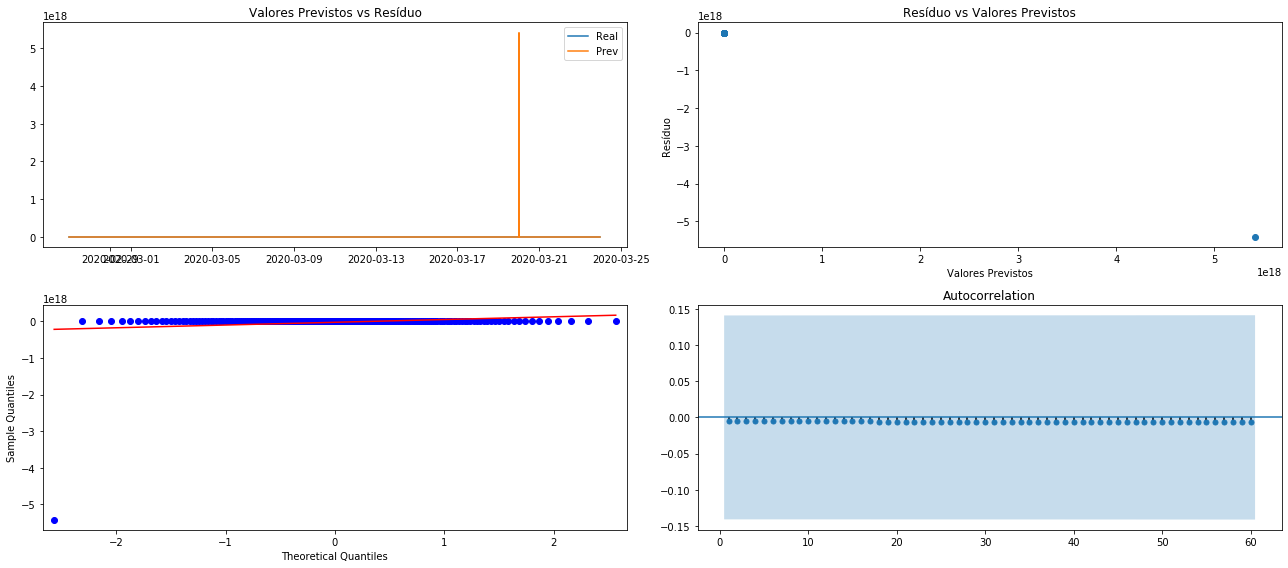

In [107]:
plotar_erro(df_casos_teste_lasso)

Conclusões:
* o método de previsão em laço com regressão linear não funcionou para prever casos acumulados.
* há uma relação diretamente proporcional entre a potência usada nos polinômios e a quantidade de dias que o modelo consegue prever. 
* há uma relação inversamente proporcional entre a quantidade de dias que o modelo consegue prever e o erro. 

#### 2.1.1.2. Mortes Acumuladas

In [108]:
expl_mortes = expl_norm[varmortes]

In [109]:
expl_mortes

,mortes_acumuladas_menos1d,mortes_acumuladas_menos9d,mortes_acumuladas_menos8d,mortes_acumuladas_menos7d,mortes_acumuladas_menos6d,mortes_acumuladas_menos5d,mortes_acumuladas_menos4d,mortes_acumuladas_menos3d,mortes_acumuladas_menos2d,mortes_acumuladas_menos14d,mortes_acumuladas_menos13d,mortes_acumuladas_menos12d,mortes_acumuladas_menos11d,mortes_acumuladas_menos10d,casos_acumulados_menos9d,casos_acumulados_menos8d,casos_acumulados_menos7d,casos_acumulados_menos6d,casos_acumulados_menos5d,casos_acumulados_menos4d,casos_acumulados_menos3d,casos_acumulados_menos2d,casos_acumulados_menos1d,casos_acumulados_menos14d,casos_acumulados_menos13d,casos_acumulados_menos12d,casos_acumulados_menos11d,casos_acumulados_menos10d,capital_S,Hospital/DIA_SUS
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00005,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00005,0.00005,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00005,0.00005,0.00005,0.00004,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00013,0.00012,0.00011,0.00010,0.00010,0.00010,0.00010,0.00009,0.00009,0.00009,0.00008,0.00008,0.00007,0.00007,0.00000,0.00000
8791,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00006,0.00036,0.00094,0.00126,0.00133,0.00131,0.00130,0.00126,0.00116,0.00009,0.00008,0.00008,0.00007,0.00007,0.00000,0.00000
8792,0.00104,0.00151,0.00139,0.00131,0.00124,0.00120,0.00120,0.00119,0.00104,0.00219,0.00198,0.00182,0.00180,0.00171,0.00058,0.00054,0.00050,0.00052,0.00051,0.00050,0.00050,0.00045,0.00043,0.00080,0.00076,0.00069,0.00067,0.00064,0.00000,0.00000
8793,0.00052,0.00076,0.00069,0.00066,0.00062,0.00060,0.00060,0.00059,0.00052,0.00110,0.00099,0.00091,0.00090,0.00085,0.00032,0.00024,0.00022,0.00021,0.00021,0.00020,0.00020,0.00018,0.00017,0.00018,0.00017,0.00015,0.00015,0.00021,0.00000,0.00000


In [110]:
df_mortes_baseline_lasso = dados_tratados[['dia_do_ano', 'mortes_acumuladas', 'mortes_acumuladas_menos1d']].copy()

In [111]:
df_mortes_baseline_lasso.set_index('dia_do_ano', inplace=True)
colunas = {'mortes_acumuladas': 'real', 'mortes_acumuladas_menos1d': 'previsão'}
df_mortes_baseline_lasso.rename(columns=colunas, inplace=True)
df_mortes_baseline_lasso

,real,previsão
dia_do_ano,,
57,0,0
58,0,0
59,0,0
60,0,0
61,0,0
...,...,...
128,0,0
128,0,0
128,2,2


In [157]:
dia = 58
n = 3
prev = {}
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_mortes[explicativas['dia_do_ano'] < dia]
        val = expl_mortes[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < dia].values, target_mortes_log[explicativas['dia_do_ano'] == dia].values

        poly_model = make_pipeline(PolynomialFeatures(n), LinearRegression())
        poly_model.fit(xtr,ytr)  

        #rfr = RandomForestRegressor(n_estimators=300, random_state=14)
        #rfr.fit(xtr,ytr)

        p = np.expm1(poly_model.predict(xts))
        
        prev.update({dia: p.round(decimals=0)})

        #p = np.expm1(rfr.predict(xts))

        erro_teste['Baseline'] = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                                            df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Regressão Linear ScikitLearn (lasso)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Regressão Linear ScikitLearn (lasso)'].iloc[0],
                                                                                 erro_teste['Regressão Linear ScikitLearn (lasso)'].iloc[1],
                                                                                 erro_teste['Regressão Linear ScikitLearn (lasso)'].iloc[2],
                                                                                 erro_teste['Regressão Linear ScikitLearn (lasso)'].iloc[3],
                                                                                 erro_teste['Regressão Linear ScikitLearn (lasso)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
        train = expl_mortes[explicativas['dia_do_ano'] < dia]
        val = expl_mortes[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < dia].values, target_mortes_log[explicativas['dia_do_ano'] == dia].values

        poly_model = make_pipeline(PolynomialFeatures(n), LinearRegression())
        poly_model.fit(xtr,ytr)  
        
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value e

Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 62 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 64 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 65 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 67 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 68 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 70 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 71 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 72 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 73 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, M

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value e

Dia do ano 74 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 75 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 76 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 77 - Viés 0.08664339756999316, MSE 0.060056626739775174, RMSE 0.24506453586713678, MAE 0.08664339756999316, MAPE nan
Dia do ano 78 - Viés 0.04346641535438361, MSE 0.030244297887121845, RMSE 0.17390887811472375, MAE 0.043488024293343024, MAPE inf
Dia do ano 79 - Viés 0.058716081044516755, MSE 0.05875300752183311, RMSE 0.24239019683525384, MAE 0.0588603949922358, MAPE inf
Dia do ano 80 - Viés -0.7639904371069035, MSE 11.676013717410392, RMSE 3.417018249499173, MAE 0.764147689189889, MAPE inf
Dia do ano 81 - Viés -9290.810470269931, MSE 1985340638.003408, RMSE 44557.161467079655, MAE 9290.81048775121, MAPE inf


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zer

Dia do ano 82 - Viés 0.17988544880650342, MSE 0.7432122841439766, RMSE 0.8620976070863302, MAE 0.17988549715967614, MAPE inf
Dia do ano 83 - Viés 0.19280899698595838, MSE 0.8547931764147051, RMSE 0.9245502562947593, MAE 0.19283428785153237, MAPE inf
Dia do ano 84 - Viés -70627.89676227859, MSE 114730993345.58904, RMSE 338719.63826384355, MAE 70627.95705454182, MAPE inf
Erro no dia 85: Input contains NaN, infinity or a value too large for dtype('float64').


Com regressão linear múltipla sem polinômio, o laço funcionou até o dia 128, com indicadores de erros aumentando absurdamente.

Com regressão linear múltipla com polinômio de potência 2, o laço funcionou até o dia 86, com indicadores de erros aumentando absurdamente. No dia 87, gerou previsão infinita.

Com regressão linear múltipla com polinômio de potência 3, o laço funcionou até o dia 84, com indicadores de erros aumentando absurdamente. No dia 85, gerou previsão infinita.


In [158]:
r_sq = poly_model.score(xtr,ytr)
print('R²:', r_sq)
n = ytr.shape[0]
k = xtr.shape[1]
ar_sq = 1 - (1 - r_sq)*(n-1)/(n-1-k)
print('R² ajustado:', ar_sq)

R²: 1.0
R² ajustado: 1.0


sem polinômio:
R² ajustado: 0.3724

com polinômio potência 2:
R² ajustado: 0.9923807474183929

com polinômio potência 3:
R² ajustado: 1.0

In [159]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [160]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred2 = pd.concat([dt,pt], axis=1, join='inner')

In [161]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [162]:
y_pred2 = pd.merge(y_pred2, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred2 = y_pred2.loc[y_pred2['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred2 = y_pred2.astype('int64')

In [163]:
df_mortes_teste_lasso = dados_tratados[['data', 'mortes_acumuladas']][dados_tratados['dia_do_ano'] <= dia].copy()
df_mortes_teste_lasso.drop([0], inplace=True)
df_mortes_teste_lasso.set_index('data', inplace=True)
df_mortes_teste_lasso = pd.concat([df_mortes_teste_lasso,y_pred2], axis=1, join='inner')
colunas = {'mortes_acumuladas': 'real'}
df_mortes_teste_lasso.rename(columns=colunas, inplace=True)
df_mortes_teste_lasso

,real,previsão
data,,
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
2020-03-02,0,0
...,...,...
2020-03-24,45,1624446
2020-03-24,0,0
2020-03-24,0,0


Text(0, 0.5, 'previsão')

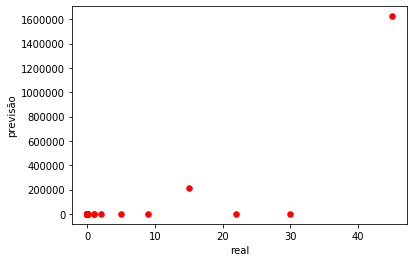

In [164]:
plt.scatter(df_mortes_teste_lasso['real'], df_mortes_teste_lasso['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [165]:
df_mortes_teste_lasso.describe()

,real,previsão
count,194.00000,194.00000
mean,0.67010,9475.02062
std,4.35407,117554.35527
min,0.00000,-1.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,0.00000,0.00000
max,45.00000,1624446.00000


sem polinômio:
* real 	previsão
* count 	8794.00000 	8794.00000
* mean 	5.53411 	-1048821053610022.25000
* std 	67.05556 	98355012157343984.00000
* min 	0.00000 	-9223372036854775808.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	0.00000
* max 	1986.00000 	30144567005195.00000

com polinômio potência 2:
*  	real 	previsão
* count 	261.00000 	261.00000
* mean 	0.89655 	-35338590174204476.00000
* std 	5.71173 	570912396505834368.00000
* min 	0.00000 	-9223372036854775808.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	0.00000 	0.00000
* max 	54.00000 	1387402183.00000

com polinômio potência 3:
* real 	previsão
* count 	194.00000 	194.00000
* mean 	0.67010 	9475.02062
* std 	4.35407 	117554.35527
* min 	0.00000 	-1.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	0.00000 	0.00000
* max 	45.00000 	1624446.00000

In [166]:
df_mortes_teste_lasso[df_mortes_teste_lasso['previsão'] < 0]

,real,previsão
data,,
2020-03-22,22,-1
2020-03-23,30,-1


sem polinômio:
* 62 previsões negativas

com polinômio potência 2:
* 7 previsões negativas 

com polinômio potência 3:
* 2 previsões negativas (-1 previsto contra 22 e 30 reais)

In [167]:
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Regressão Linear ScikitLearn (lasso)'] = check_erro(df_mortes_teste_lasso['real'],
                                                                df_mortes_teste_lasso['previsão'])

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [168]:
erro_teste

,Baseline,Regressão Linear ScikitLearn (lasso)
Base Teste,,
VIÉS,0.23590,-9474.35052
MSE,2.06154,13836783728.71134
RMSE,1.43581,117629.85900
MAE,0.23590,9474.98969
MAPE,nan,559441.61616


sem polinômio:
* Baseline 	Regressão Linear ScikitLearn (lasso)
* Base Teste 		
* VIÉS 	0.36453 	-1048830080539344.37500
* MSE 	21.03945 	2590765068150100.50000
* RMSE 	4.58688 	50899558.62432
* MAE 	0.38204 	1048830080539347.62500
* MAPE 	nan 	inf

com polinômio potência 2:
* 	Baseline 	Regressão Linear ScikitLearn (lasso)
* Base Teste 		
* VIÉS 	0.22137 	-35338590184835952.00000
* MSE 	1.85496 	7375037136190711.00000
* RMSE 	1.36197 	85878036.40158
* MAE 	0.22137 	35,338,590,184,835,944.00000
* MAPE 	nan 	inf

com polinômio potência 3:
*  	Baseline 	Regressão Linear ScikitLearn (lasso)
* Base Teste 		
* VIÉS 	0.23590 	-9474.35052
* MSE 	2.06154 	13836783728.71134
* RMSE 	1.43581 	117629.85900
* MAE 	0.23590 	9474.98969
* MAPE 	nan 	559441.61616

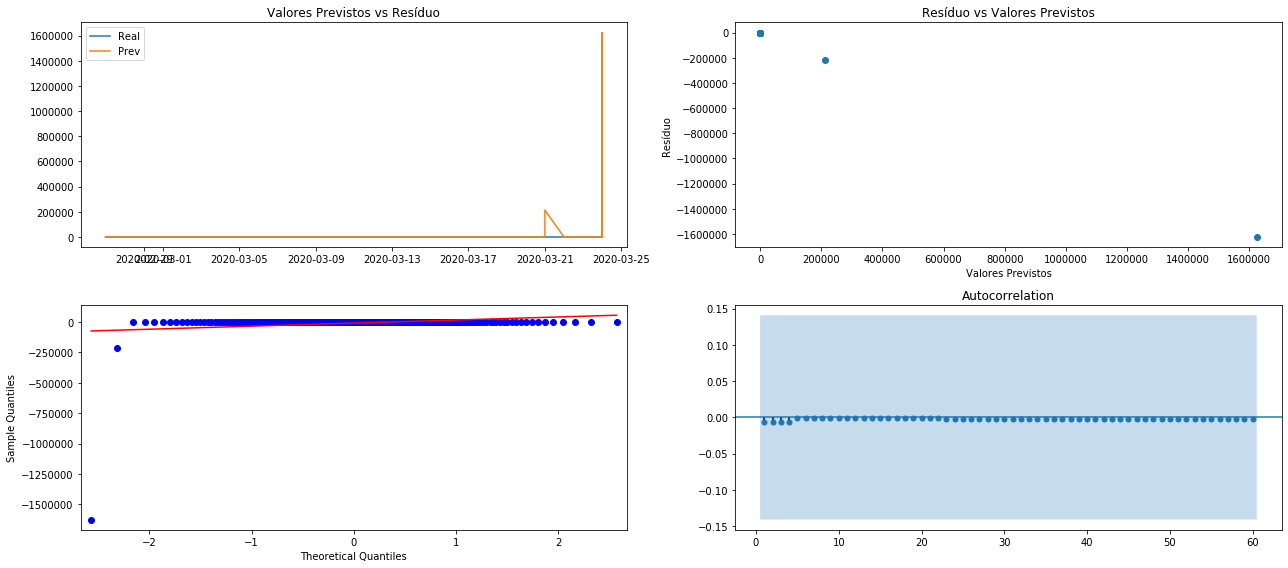

In [169]:
plotar_erro(df_mortes_teste_lasso)

## 2.2. Método de Previsão Tradicional

### 2.2.1. Separando as bases de teste e de treino

In [287]:
explicativas

,dias_epidemiológicos,dia_do_ano,mês,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,18,128,5,6638,-22.07300,-50.30800,0.73200,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,278,8
8791,40,128,5,35653,-22.54900,-47.91400,0.75500,12,4,4,2,0,0,20,36,8,2,0,0,0.53000,27,28,26,26,26,24,17,6,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,341,10
8792,21,128,5,6357,-23.13400,-49.05400,0.68500,0,0,0,0,0,0,3,5,4,0,0,0,0.53000,10,10,10,10,10,10,9,9,9,9,9,9,9,9,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,1,0,0,0,1,14,3
8793,36,128,5,18705,-22.47600,-46.63300,0.74500,1,7,2,2,0,0,3,15,6,6,0,0,0.53000,4,4,4,4,4,4,4,4,5,3,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,380,4


In [288]:
len(explicativas)*0.8

7036.0

In [289]:
explicativas.iloc[7036]

dias_epidemiológicos             7.00000
dia_do_ano                     124.00000
mês                              5.00000
habitantes                   21496.00000
lat                            -21.35900
                                 ...    
faixa_pop_Maior de 100 mil       0.00000
faixa_pop_Maior de 50 mil        0.00000
faixa_pop_Menor de 10 mil        0.00000
LE_munuf                       269.00000
LE_Nome_Mesorregião             12.00000
Name: 7036, Length: 59, dtype: float64

In [290]:
explicativas[explicativas['dia_do_ano']<125]

,dias_epidemiológicos,dia_do_ano,mês,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7359,11,124,5,36305,-22.05900,-46.97900,0.71500,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,14,14,15,13,13,1,1,1,1,0,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,4
7360,31,124,5,35292,-21.34000,-47.72900,0.75600,1,1,0,0,0,0,3,10,0,0,0,0,0.53000,8,8,8,8,8,8,8,8,8,7,7,7,6,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,87,12
7361,19,124,5,69116,-20.28400,-50.24600,0.79700,15,17,9,5,0,5,21,49,7,7,0,0,0.53000,10,10,10,9,9,9,8,8,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,107,13
7362,53,124,5,194276,-23.54100,-46.36900,0.73800,0,0,0,0,0,0,60,80,29,27,11,2,0.61000,103,98,98,95,86,75,74,67,62,60,59,58,55,56,6,6,6,6,5,3,3,3,3,3,3,3,2,2,0,0,0,0,0,1,1,0,0,108,9


#### 2.2.1.1. Casos acumulados

In [291]:
x_treino1 = expl_casos[explicativas['dia_do_ano']<125]
x_teste1 = expl_casos[explicativas['dia_do_ano']>=125]
y_treino1 = target_casos_log[dados_sel['dia_do_ano']<125]
y_teste1 = target_casos_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [292]:
x_treino1.shape

(7364, 41)

In [293]:
y_treino1.shape

(7364,)

#### 2.2.1.2. Mortes acumuladas

In [294]:
x_treino2 = expl_mortes[explicativas['dia_do_ano']<125]
x_teste2 = expl_mortes[explicativas['dia_do_ano']>=125]
y_treino2 = target_mortes_log[dados_sel['dia_do_ano']<125]
y_teste2 = target_mortes_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [295]:
x_treino2.shape

(7364, 30)

In [296]:
y_treino2.shape

(7364,)

### 2.2.2. Regressão Linear

Como a curva de casos e mortes tende a crescer de forma exponencial, o modelo com regressão linear múltipla não dará conta sozinho de explicar as variáveis, pois seu resultado é uma reta. Por isso, vamos adicionar uma etapa para realizar uma regressão polinomial, acrescentado termos elevados a potências, de forma a curvar a reta. 

#### 2.2.2.1. Casos Acumulados

In [297]:
n=1
#Transformando x em polinômio
x_treino1P = PolynomialFeatures(degree=n, include_bias=False).fit_transform(x_treino1)
x_teste1P = PolynomialFeatures(degree=n, include_bias=False).fit_transform(x_teste1)

In [298]:
LR = LinearRegression(fit_intercept=True)
LR.fit(x_treino1P,y_treino1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [299]:
r_sq = LR.score(x_treino1P, y_treino1)
print('R²:', r_sq)
n = y_treino1.shape[0]
k = x_treino1P.shape[1]
ar_sq = 1 - (1 - r_sq)*(n-1)/(n-1-k)
print('R² ajustado:', ar_sq)
print('intercept:', LR.intercept_)
print('coefficients:', LR.coef_)

R²: 0.7752644341570394
R² ajustado: 0.7740060132065394
intercept: -9.522382161850702
coefficients: [ 12.7374645   -4.78479856 -14.3018406  -49.4465526   -8.50785599
  -1.47518504  -2.94586734 -25.47530328  53.38922071 -34.36014099
  16.66131704 -26.68449983 -10.76296555   2.80978847  -0.92343131
   3.17047921  10.12993179   2.22823622   9.49133396   6.88116374
  33.59923786   6.53221555  33.40710355  19.79153062   0.92474929
  -4.3197294  -14.2123654  -28.29191838 -20.28440152   5.1458751
  10.38607422   9.89832729   0.94003248   4.75533347   0.53841613
  12.99964976   5.83555989  -5.26374188  14.5579832    4.57996211
  -6.87279834]


Regressão linear sem polinômio:
* R²: 0.7752644341570394
* R² ajustado: 0.7740060132065394

Regressão linear com polinômio potência 2:
* R²: 0.961067142629879
* R² ajustado: 0.9556366871746461

Regressão linear com polinômio potência 3:
* R²: 0.9928261859440407
* R² ajustado: 1.008983128043202

In [300]:
y_pred1 = LR.predict(x_treino1P)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [301]:
df_casos_LR_treino = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_LR_treino = df_casos_LR_treino.iloc[0:7364]
df_casos_LR_treino = pd.concat([df_casos_LR_treino,y_pred1], axis=1, join='inner')
df_casos_LR_treino.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_LR_treino.rename(columns=colunas, inplace=True)
df_casos_LR_treino

,real,previsão
data,,
2020-02-26,1,-1.00000
2020-02-27,1,-1.00000
2020-02-28,1,-1.00000
2020-02-29,1,-1.00000
2020-03-01,1,16.00000
...,...,...
2020-05-03,14,2.00000
2020-05-03,8,10.00000
2020-05-03,10,5.00000


Text(0, 0.5, 'previsão')

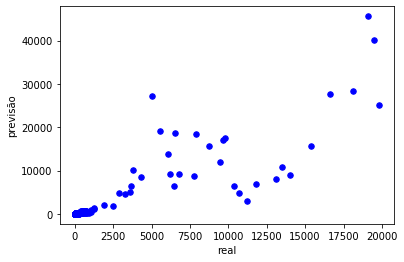

In [302]:
plt.scatter(df_casos_LR_treino['real'], df_casos_LR_treino['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [303]:
df_casos_LR_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,65.09791,79.94527
std,723.44974,1168.50366
min,1.00000,-1.00000
25%,1.00000,2.00000
50%,3.00000,4.00000
75%,11.00000,10.00000
max,19822.00000,45637.00000


Regressão linear sem polinômio:
* Real | Previsto
* mean 	65.09791 	79.94527
* min: 1.00000 | -1.00000
* 25%: 1.00000 | 2.00000
* 50%: 3.00000 | 4.00000
* 75%: 11.00000 | 10.00000
* max: 19822.00000 | 45637.00000

Regressão linear com polinômio potência 2:
* Real | Previsto
* mean 	65.09791 	68.28762
* min: 1.00000 | 0.00000
* 25%: 1.00000 | 2.00000
* 50%: 3.00000 | 3.00000
* 75%: 11.00000 | 9.00000
* max: 19822.00000 | 25563.00000

Regressão linear com polinômio potência 3:
* Real | Previsto
* mean 	65.09791 	65.14625
* min: 1.00000 | 0.00000
* 25%: 1.00000 | 1.00000
* 50%: 3.00000 | 3.00000
* 75%: 11.00000 | 11.00000
* max: 19822.00000 | 19870.00000

In [304]:
df_casos_LR_treino[df_casos_LR_treino['previsão'] < 0]

,real,previsão
data,,
2020-02-26,1,-1.00000
2020-02-27,1,-1.00000
2020-02-28,1,-1.00000
2020-02-29,1,-1.00000


Regressão linear sem polinômio:
* 4 previsões negativas (-1 previsto contra 1 real)

Regressão linear com polinômio potência 2:
* sem previsões negativas

Regressão linear com polinômio potência 3:
* sem previsões negativas

In [305]:
df_casos_baseline_treino = df_casos.iloc[0:7364]
erro_treino = check_erro(df_casos_baseline_treino['real'].values,
                         df_casos_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Regressão Linear ScikitLearn'] = check_erro(df_casos_LR_treino['real'], df_casos_LR_treino['previsão'])
erro_treino

,Baseline,Regressão Linear ScikitLearn
Base Treino,,
VIÉS,4.31545,-14.84737
MSE,2087.44337,386216.65318
RMSE,45.68855,621.46332
MAE,4.41214,40.32319
MAPE,11.90706,95.74353


#### Erro Treino
Regressão linear sem polinômio:
* Baseline | Regressão Linear ScikitLearn
* VIÉS: 4.31545 | -14.84737
* MSE: 2087.44337 | 386216.65318
* RMSE: 45.68855 | 621.46332
* MAE: 4.41214 | 40.32319
* MAPE: 11.90706 | 95.74353

Regressão linear com polinômio potência 2:
* Baseline 	Regressão Linear ScikitLearn
* VIÉS 	4.31545 	-3.18971
* MSE 	2087.44337 	11642.50014
* RMSE 	45.68855 	107.90042
* MAE 	4.41214 	7.80948
* MAPE 	11.90706 	27.98055

Regressão linear com polinômio potência 3:
* Baseline | Regressão Linear ScikitLearn
* VIÉS: 4.31545 | -0.04834
* MSE: 2087.44337 | 12.30554
* RMSE: 45.68855 | 3.50793
* MAE: 4.41214 | 0.71999
* MAPE: 11.90706 | 6.53939

In [306]:
df_casos_LR_treino

,real,previsão
data,,
2020-02-26,1,-1.00000
2020-02-27,1,-1.00000
2020-02-28,1,-1.00000
2020-02-29,1,-1.00000
2020-03-01,1,16.00000
...,...,...
2020-05-03,14,2.00000
2020-05-03,8,10.00000
2020-05-03,10,5.00000


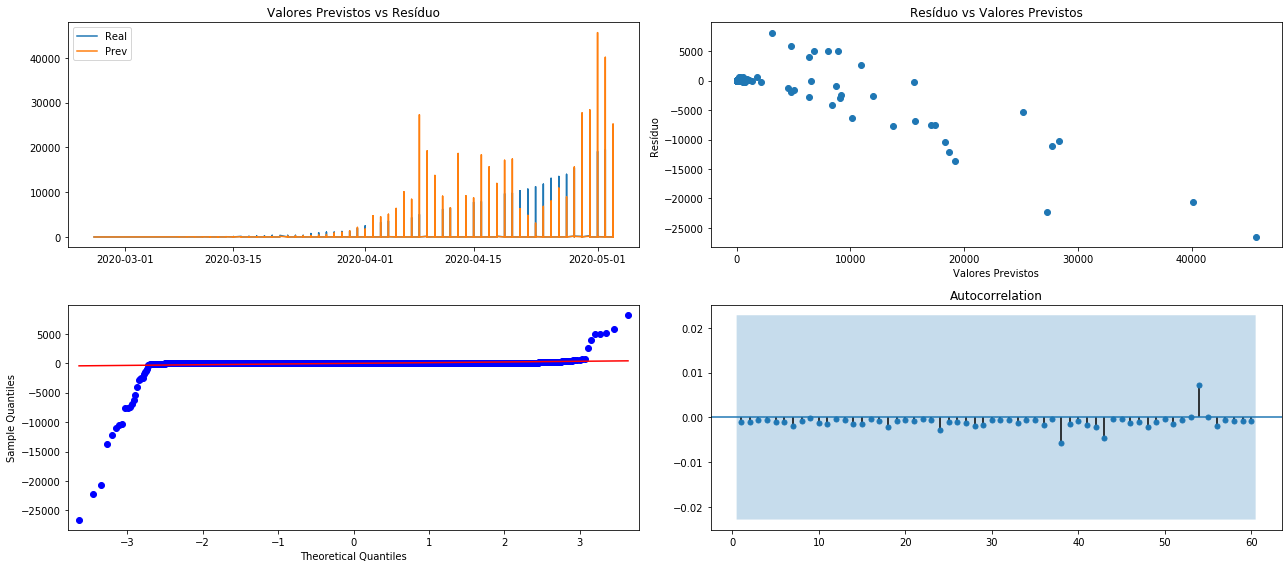

In [307]:
plotar_erro(df_casos_LR_treino)

Regressão linear sem polinômio:
* Com a base treino, a regressão linear teve desempenho pior que a baseline. O erro médio absoluto foi de 40 casos, contra 4.4 casos na baseline (que apenas repete o resultado do dia anterior) e o MAPE aponta 95.7% de erro (contra 11.9% na baseline).
* Analisando os intervalos interquartis, apenas o valor máximo previsto ficou muito discrepante do valor real.

Regressão linear com polinômio potência 2:
*  Com a base treino, a regressão linear teve desempenho pior que a baseline. O erro médio absoluto baixou para 7.8 casos (contra 4.4 casos da baseline). O R² ajustado alto (95%) dá mostras de overfitting com a base de treino, o que pode ser comprovado pela média prevista próxima da real e pelo gráfico de dispersão.

Regressão linear com polinômio potência 3:
* Com a base treino, a regressão linear teve desempenho melhor que a baseline pela primeira vez: o erro médio absoluto baixou para 0.7 casos, contra 4.4 da baseline. O R² ajustado alto (100%) dá mostras de overfitting com a base de treino, que pode ser confirmado olhando para as previsões dos intervalos interquartis em comparação com os dados reais, pelas médias e pelo gráfico de dispersão.

In [308]:
y_pred2 = LR.predict(x_teste1P)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [309]:
df_casos_LR_teste = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_LR_teste = df_casos_LR_teste.iloc[7364:]
df_casos_LR_teste.reset_index(drop=True, inplace=True)
df_casos_LR_teste = pd.concat([df_casos_LR_teste,y_pred2], axis=1, join='inner')
df_casos_LR_teste.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_LR_teste.rename(columns=colunas, inplace=True)
df_casos_LR_teste

,real,previsão
data,,
2020-05-04,4,11.00000
2020-05-04,1,1.00000
2020-05-04,236,269.00000
2020-05-04,14,17.00000
2020-05-04,1,2.00000
...,...,...
2020-05-07,2,4.00000
2020-05-07,36,24.00000
2020-05-07,10,4.00000


Text(0, 0.5, 'previsão')

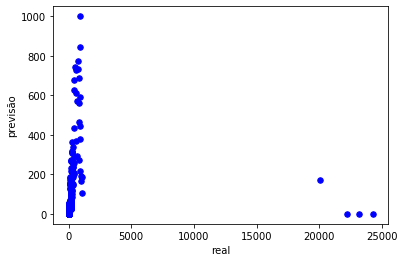

In [310]:
plt.scatter(df_casos_LR_teste['real'], df_casos_LR_teste['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [311]:
df_casos_LR_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,101.86723,26.79944
std,1191.41907,81.70797
min,1.00000,-1.00000
25%,2.00000,2.00000
50%,5.00000,6.00000
75%,19.00000,16.00000
max,24273.00000,1000.00000


Regressão linear sem polinômio:
* Real | Previsto
* mean 	101.86723 	26.79944
* min: 1.00000 | -1.00000
* 25%: 2.00000 | 2.00000
* 50%: 5.00000 | 6.00000
* 75%: 19.00000 | 16.00000
* max: 24273.00000 | 1000.00000

Regressão linear com polinômio potência 2:
* Real | Previsto
* mean 	101.86723 	1454674754612219.75000
* min 	1.00000 	-1.00000
* 25% 	2.00000 	2.00000
* 50% 	5.00000 	4.00000
* 75% 	19.00000 	13.00000
* max 	24273.00000 	2081639545219988992.00000

Regressão linear com polinômio potência 3:
* Real | Previsto
* mean 	101.86723 	inf
* min: 1.00000 | -1.00000
* 25%: 2.00000 | -1.00000
* 50%: 5.00000 | 1.00000
* 75%: 19.00000 | 1033585816.5
* max: 24273.00000 | inf

In [312]:
df_casos_LR_teste[df_casos_LR_teste['previsão'] < 0]

,real,previsão
data,,
2020-05-05,22207,-1.00000
2020-05-07,24273,-1.00000


Regressão linear sem polinômio:
* 2 previsões negativas (-1 previsto contra 22207 e 24273 real)

Regressão linear com polinômio potência 2:
* 28 previsões negativas 

Regressão linear com polinômio potência 3:
* 398 previsões negativas 

In [313]:
df_casos_baseline_teste = df_casos.iloc[7364:]
erro_teste = check_erro(df_casos_baseline_teste['real'].values,
                         df_casos_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Regressão Linear ScikitLearn'] = check_erro(df_casos_LR_teste['real'], df_casos_LR_teste['previsão'])
erro_teste

,Baseline,Regressão Linear ScikitLearn
Base Teste,,
VIÉS,5.69602,75.06778
MSE,4835.93082,1413445.71908
RMSE,69.54086,1188.88423
MAE,5.92383,82.12439
MAPE,11.07093,103.70583


#### Erro Teste
Regressão linear sem polinômio:
* Baseline | Regressão Linear ScikitLearn
* VIÉS: 5.69602 | 75.06778
* MSE: 4835.93082 | 1413445.71908
* RMSE: 69.54086 | 1188.88423
* MAE: 5.92383 | 82.12439
* MAPE: 11.07093 | 103.70583

Regressão linear com polinômio potência 2:
* Baseline | Regressão Linear ScikitLearn
* VIÉS 	5.69602 	-1454674754612119.25000
* MSE 	4835.93082 	3028108452986498715868285903044608.00000
* RMSE 	69.54086 	55028251407676936.00000
* MAE 	5.92383 	1454674754612287.00000
* MAPE 	11.07093 	166058764005675.18750

Regressão linear com polinômio potência 3:
* Baseline | Regressão Linear ScikitLearn
* Houve previsão infinita, fora da escala de medição.

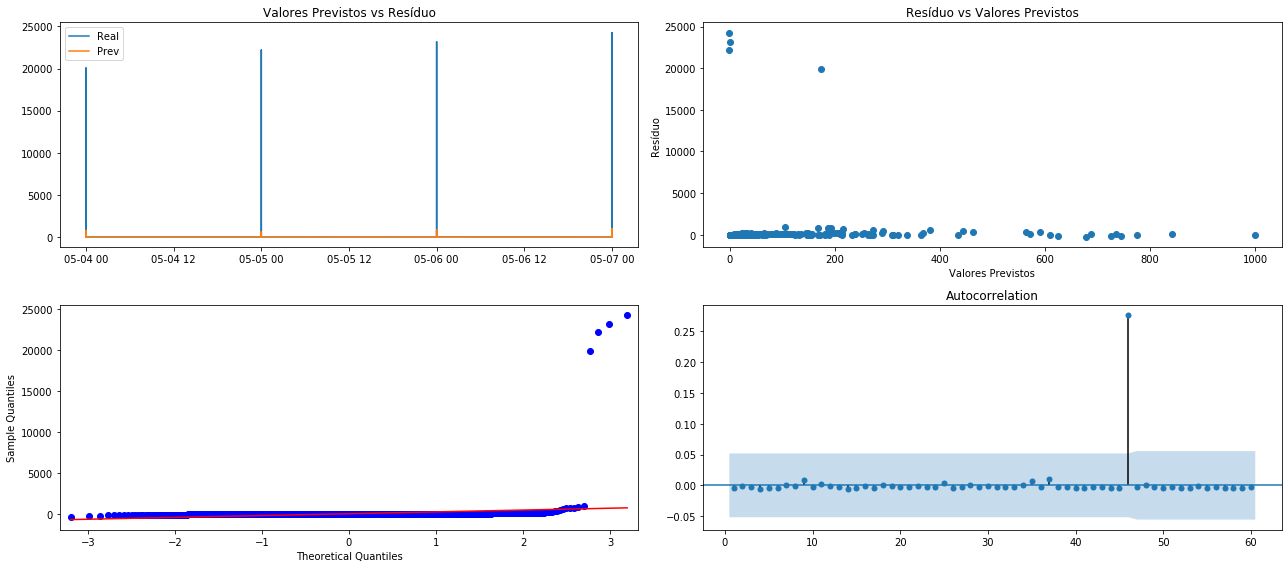

In [314]:
plotar_erro(df_casos_LR_teste)

Regressão linear sem polinômio:
* Com a base teste, a regressão linear teve desempenho pior que a baseline. O erro médio absoluto foi de 82.1 casos, contra 5.9 casos na baseline (que apenas repete o resultado do dia anterior) e o MAPE aponta 103.7% de erro (contra 11% na baseline).
* Analisando os intervalos interquartis, apenas o valor máximo previsto ficou muito discrepante do valor real.

Regressão linear com polinômio potência 2:
*  Com a base teste, a regressão linear teve desempenho pior que a baseline. Todos os indicadores de erros explodiram, assim como a diferença entre o valor máximo previsto e real, invalidando o modelo.

Regressão linear com polinômio potência 3:
* Com a base teste, a regressão linear foi ainda pior na comparação com a baseline, com indicadores de erro fora de escala devido à previsão infinita no valor máximo, invalidando o modelo.

Vamos testar outro método de regressão linear com a biblioteca do StatsModel.

#### OLS (Ordinary Least Square)

In [315]:
x_treino1 = expl_casos[explicativas['dia_do_ano']<125]
x_teste1 = expl_casos[explicativas['dia_do_ano']>=125]
y_treino1 = target_casos_log[dados_sel['dia_do_ano']<125]
y_teste1 = target_casos_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [316]:
x_treino1C = sm.add_constant(x_treino1)

C:\Users\gusta\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [317]:
model = sm.OLS(y_treino1, x_treino1C)
results = model.fit()
print(results.summary())
#results.summary()

                            OLS Regression Results                            
Dep. Variable:       casos_acumulados   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     631.5
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:33:48   Log-Likelihood:                -7448.1
No. Observations:                7364   AIC:                         1.498e+04
Df Residuals:                    7323   BIC:                         1.526e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Vamos eliminar as variáveis com p-valor > 0.05.

In [318]:
expl_casos2 = expl_norm[['mortes_acumuladas_menos6d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos14d',
                         'casos_acumulados_menos1d', 'casos_acumulados_menos13d', 'capital_S', 'Hospital/DIA_SUS',
                         'papel_Metropolitana', 'papel_Interior', 'dias_epidemiológicos', 'Obstétrico_SUS',
                         'Obstétrico_Não_SUS', 'Hospital/DIA_Não_SUS', 'Clínicos_SUS', 'Cirúrgicos_SUS'
                        ]]

In [319]:
x_treino1 = expl_casos2[explicativas['dia_do_ano']<125]
x_teste1 = expl_casos2[explicativas['dia_do_ano']>=125]
y_treino1 = target_casos_log[dados_sel['dia_do_ano']<125]
y_teste1 = target_casos_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [320]:
x_treino1C = sm.add_constant(x_treino1)

In [321]:
model = sm.OLS(y_treino1, x_treino1C)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       casos_acumulados   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1780.
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:33:50   Log-Likelihood:                -7496.9
No. Observations:                7364   AIC:                         1.502e+04
Df Residuals:                    7349   BIC:                         1.513e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Vamos eliminar as variáveis com p-valor > 0.05.

In [322]:
expl_casos2 = expl_norm[['mortes_acumuladas_menos6d', 'mortes_acumuladas_menos14d',
                         'casos_acumulados_menos1d', 'casos_acumulados_menos13d', 'capital_S', 'Hospital/DIA_SUS',
                         'papel_Metropolitana', 'papel_Interior', 'dias_epidemiológicos', 'Obstétrico_SUS',
                         'Obstétrico_Não_SUS', 'Hospital/DIA_Não_SUS', 'Clínicos_SUS', 'Cirúrgicos_SUS'
                        ]]

In [323]:
x_treino1 = expl_casos2[explicativas['dia_do_ano']<125]
x_teste1 = expl_casos2[explicativas['dia_do_ano']>=125]
y_treino1 = target_casos_log[dados_sel['dia_do_ano']<125]
y_teste1 = target_casos_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [324]:
x_treino1C = sm.add_constant(x_treino1)

In [325]:
model = sm.OLS(y_treino1, x_treino1C)
results = model.fit()
print(results.summary())
#results.summary()

                            OLS Regression Results                            
Dep. Variable:       casos_acumulados   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1916.
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:33:55   Log-Likelihood:                -7498.1
No. Observations:                7364   AIC:                         1.502e+04
Df Residuals:                    7350   BIC:                         1.512e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [326]:
y_pred1 = results.predict(x_treino1C)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [327]:
df_casos_LR_treino = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_LR_treino = df_casos_LR_treino.iloc[0:7364]
df_casos_LR_treino = pd.concat([df_casos_LR_treino,y_pred1], axis=1, join='inner')
df_casos_LR_treino.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_LR_treino.rename(columns=colunas, inplace=True)
df_casos_LR_treino

,real,previsão
data,,
2020-02-26,1,-1.00000
2020-02-27,1,-1.00000
2020-02-28,1,-1.00000
2020-02-29,1,-1.00000
2020-03-01,1,20.00000
...,...,...
2020-05-03,14,2.00000
2020-05-03,8,10.00000
2020-05-03,10,5.00000


Text(0, 0.5, 'previsão')

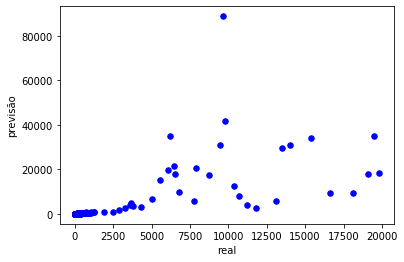

In [328]:
plt.scatter(df_casos_LR_treino['real'], df_casos_LR_treino['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [329]:
df_casos_LR_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,65.09791,93.06192
std,723.44974,1624.26722
min,1.00000,-1.00000
25%,1.00000,2.00000
50%,3.00000,4.00000
75%,11.00000,11.00000
max,19822.00000,88797.00000


In [330]:
df_casos_LR_treino[df_casos_LR_treino['previsão'] < 0]

,real,previsão
data,,
2020-02-26,1,-1.00000
2020-02-27,1,-1.00000
2020-02-28,1,-1.00000
2020-02-29,1,-1.00000


In [331]:
erro_treino['Regressão Linear StatsModels OLS'] = check_erro(df_casos_LR_treino['real'], df_casos_LR_treino['previsão'])
erro_treino

,Baseline,Regressão Linear ScikitLearn,Regressão Linear StatsModels OLS
Base Treino,,,
VIÉS,4.31545,-14.84737,-27.96401
MSE,2087.44337,386216.65318,1482975.94555
RMSE,45.68855,621.46332,1217.77500
MAE,4.41214,40.32319,58.86027
MAPE,11.90706,95.74353,96.80734


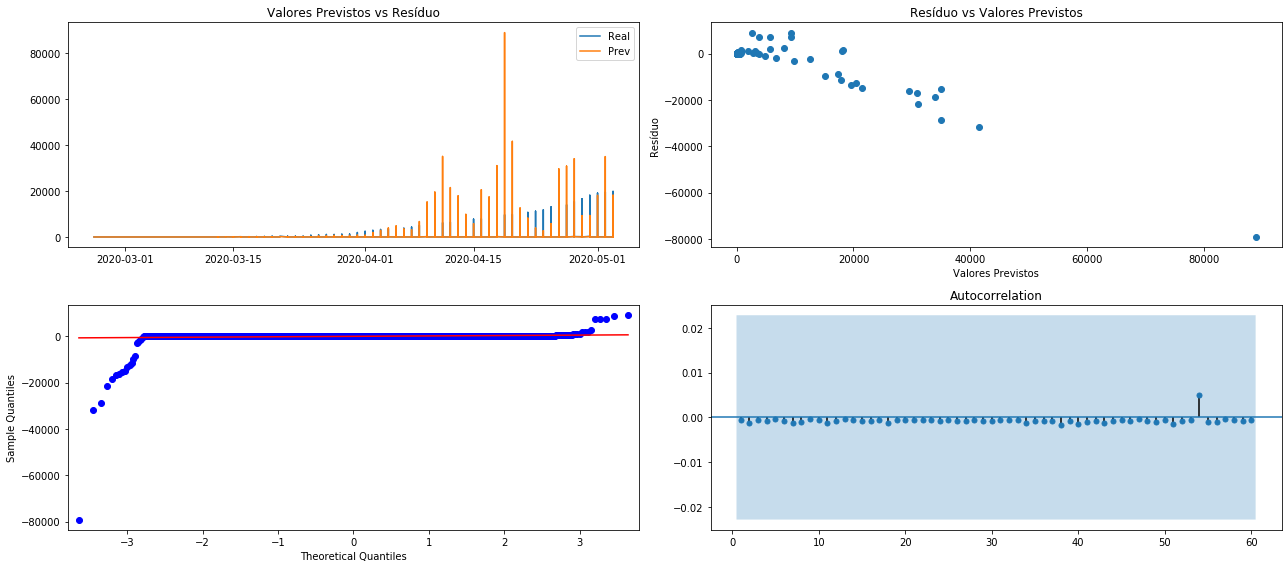

In [332]:
plotar_erro(df_casos_LR_treino)

Utilizando o StatsModel, conseguimos ter acesso ao p-valor, e com isso, excluímos algumas variáveis. Ainda assim, as métricas de erro pioraram em relação ao modelo do scikitlearn com todas as variáveis.

In [333]:
x_teste1C = sm.add_constant(x_teste1)

C:\Users\gusta\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [334]:
y_pred2 = results.predict(x_teste1C)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [335]:
df_casos_LR_teste = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_LR_teste = df_casos_LR_teste.iloc[7364:]
df_casos_LR_teste = pd.concat([df_casos_LR_teste,y_pred2], axis=1, join='inner')
df_casos_LR_teste.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_LR_teste.rename(columns=colunas, inplace=True)
df_casos_LR_teste

,real,previsão
data,,
2020-05-04,4,11.00000
2020-05-04,1,1.00000
2020-05-04,236,248.00000
2020-05-04,14,19.00000
2020-05-04,1,3.00000
...,...,...
2020-05-07,2,4.00000
2020-05-07,36,24.00000
2020-05-07,10,4.00000


Text(0, 0.5, 'previsão')

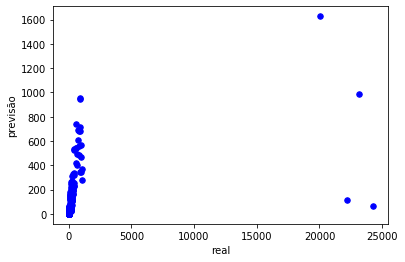

In [336]:
plt.scatter(df_casos_LR_teste['real'], df_casos_LR_teste['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [337]:
df_casos_LR_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,101.86723,29.74004
std,1191.41907,97.02515
min,1.00000,0.00000
25%,2.00000,2.00000
50%,5.00000,6.00000
75%,19.00000,17.00000
max,24273.00000,1627.00000


In [338]:
df_casos_LR_teste[df_casos_LR_teste['previsão']<0]

,real,previsão
data,,


In [339]:
erro_teste['Regressão Linear StatsModel OLS'] = check_erro(df_casos_LR_teste['real'], df_casos_LR_teste['previsão'])
erro_teste

,Baseline,Regressão Linear ScikitLearn,Regressão Linear StatsModel OLS
Base Teste,,,
VIÉS,5.69602,75.06778,72.12718
MSE,4835.93082,1413445.71908,1335712.03075
RMSE,69.54086,1188.88423,1155.73009
MAE,5.92383,82.12439,78.14256
MAPE,11.07093,103.70583,104.45193


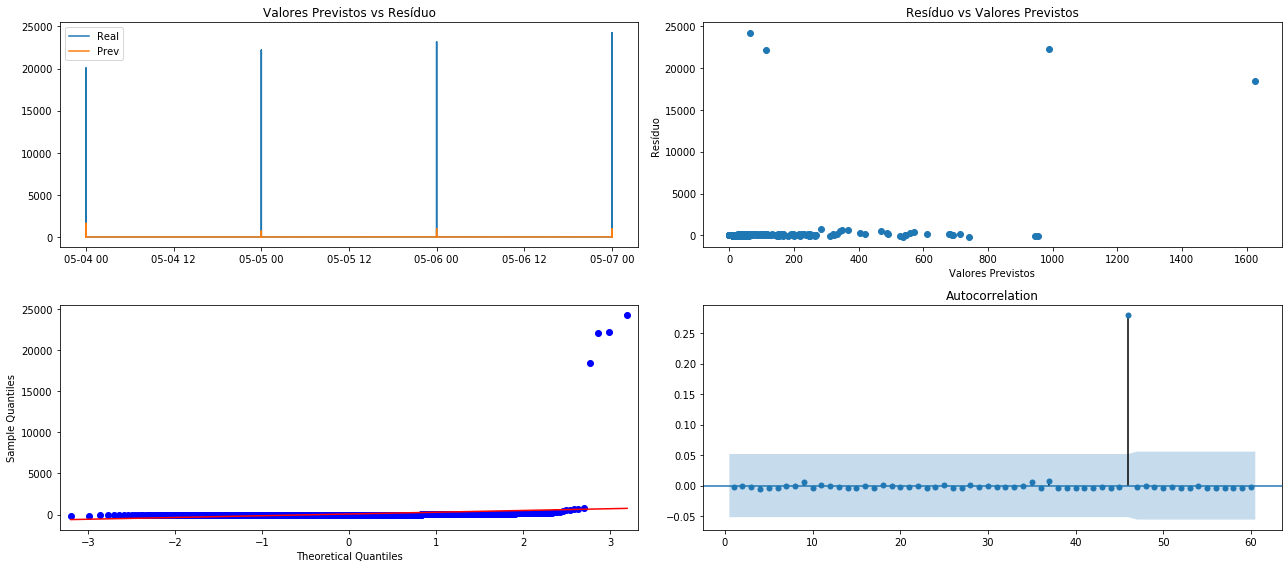

In [340]:
plotar_erro(df_casos_LR_teste)

Já com a base teste, a regressão linear do StatsModel sem as variáveis com p-valor > 0.05 teve resultados similares aos que tivemos com a regressão linear do ScikitLearn, porém um pouco melhores. O viés baixou de 75 para 72 e a baseline continua sendo o melhor resultado.

#### 2.2.2.2. Mortes Acumuladas

In [398]:
x_treino2 = expl_mortes[explicativas['dia_do_ano']<125]
x_teste2 = expl_mortes[explicativas['dia_do_ano']>=125]
y_treino2 = target_mortes_log[dados_sel['dia_do_ano']<125]
y_teste2 = target_mortes_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [399]:
n = 1
#Transformando x em polinômio
x_treino2P = PolynomialFeatures(degree=n, include_bias=False).fit_transform(x_treino2)
x_teste2P = PolynomialFeatures(degree=n, include_bias=False).fit_transform(x_teste2)

In [400]:
LR = LinearRegression(fit_intercept=True)
LR.fit(x_treino2P,y_treino2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [401]:
r_sq = LR.score(x_treino2P, y_treino2)
print('R²:', r_sq)
n = y_treino2.shape[0]
k = x_treino2P.shape[1]
ar_sq = 1 - (1 - r_sq)*(n-1)/(n-1-k)
print('R² ajustado:', ar_sq)
print('intercept:', LR.intercept_)
print('coefficients:', LR.coef_)

R²: 0.3857306910737138
R² ajustado: 0.38321765694473686
intercept: 0.38135273682281445
coefficients: [ 194.19252786   24.60425361   -9.52692401   14.24774578  -37.87477509
  -40.99431058   19.24623014   19.37472524  -50.95629218 -225.38568314
  136.0721314   -66.73789164   44.92299814  -26.05551087   28.58768387
   31.54928492  -90.57913712   -7.73685816    8.44125952   47.76283063
   44.65399003  -16.8090519   -83.30398371   17.049944    101.06439258
  -29.07851925   25.2732194   -90.2768363   -11.91090604   11.68459872]


Regressão linear sem polinômio:
* R²: 0.3857306910737138
* R² ajustado: 0.38321765694473686

Regressão linear com polinômio potência 2:
* R²: 0.9426548567951172
* R² ajustado: 0.9385217982793314

Regressão linear com polinômio potência 3:
* R²: 0.987739965274037
* R² ajustado: 0.9526883460758565

In [402]:
y_pred1 = LR.predict(x_treino2P)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [403]:
df_mortes_LR_treino = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_LR_treino = df_mortes_LR_treino.iloc[0:7364]
df_mortes_LR_treino = pd.concat([df_mortes_LR_treino,y_pred1], axis=1, join='inner')
df_mortes_LR_treino.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_LR_treino.rename(columns=colunas, inplace=True)
df_mortes_LR_treino

,real,previsão
data,,
2020-02-26,0,0.00000
2020-02-27,0,0.00000
2020-02-28,0,0.00000
2020-02-29,0,0.00000
2020-03-01,0,0.00000
...,...,...
2020-05-03,2,1.00000
2020-05-03,1,0.00000
2020-05-03,0,0.00000


Text(0, 0.5, 'previsão')

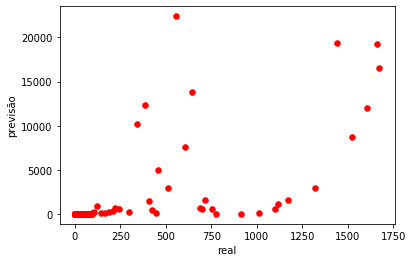

In [404]:
plt.scatter(df_mortes_LR_treino['real'], df_mortes_LR_treino['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [405]:
df_mortes_LR_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,4.98669,22.92260
std,58.68772,558.42750
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1673.00000,22398.00000


Regressão linear sem polinômio:
* Real | Previsto
* mean 	4.98669 	22.92260
* min: 0.00000 | 0.00000
* 25%: 0.00000 | 0.00000
* 50%: 0.00000 | 0.00000
* 75%: 1.00000 | 1.00000
* max: 1673.00000 | 22398.00000

Regressão linear com polinômio potência 2:
* Real | Previsto
* mean 	4.98669 	4.99919
* min: 0.00000 | 0.00000
* 25%: 0.00000 | 0.00000
* 50%: 0.00000 | 0.00000
* 75%: 1.00000 | 1.00000
* max: 1673.00000 | 1626.00000

Regressão linear com polinômio potência 3:
* Real | Previsto
* mean 	4.98669 	4.97637
* min: 0.00000 | -0.00000
* 25%: 0.00000 | -0.00000
* 50%: 0.00000 | 0.00000
* 75%: 1.00000 | 1.00000
* max: 1673.00000 | 1673.00000

In [406]:
df_mortes_LR_treino[df_mortes_LR_treino['previsão'] < 0]

,real,previsão
data,,


Regressão linear sem polinômio:
* sem previsões negativas

Regressão linear com polinômio potência 2:
* sem previsões negativas

Regressão linear com polinômio potência 3:
* sem previsões negativas

In [407]:
df_mortes_baseline_treino = df_mortes.iloc[0:7364]
erro_treino = check_erro(df_mortes_baseline_treino['real'].values,
                         df_mortes_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Regressão Linear ScikitLearn'] = check_erro(df_mortes_LR_treino['real'], df_mortes_LR_treino['previsão'])
erro_treino

,Baseline,Regressão Linear ScikitLearn
Base Treino,,
VIÉS,0.35646,-17.93590
MSE,16.43061,269773.48832
RMSE,4.05347,519.39724
MAE,0.36353,21.56817
MAPE,9.64655,inf


#### Erro Treino
Regressão linear sem polinômio:
* Baseline | Regressão Linear ScikitLearn
* VIÉS: 0.35646 | -17.93590
* MSE: 16.43061 | 269773.48832
* RMSE: 4.05347 | 519.39724
* MAE: 0.36353 | 21.56817
* MAPE: 9.64655 | inf

Regressão linear com polinômio potência 2:
* Baseline | Regressão Linear ScikitLearn
* VIÉS: 0.35646 | -0.01249
* MSE: 16.43061 | 4.00679
* RMSE: 4.05347 | 2.00170
* MAE: 0.36353 | 0.45220
* MAPE: 9.64655 | inf

Regressão linear com polinômio potência 3:
* Baseline | Regressão Linear ScikitLearn
* VIÉS: 0.35646 | 0.01032
* MSE: 16.43061 | 0.08365
* RMSE: 4.05347 | 0.28922
* MAE: 0.36353 | 0.03286
* MAPE: 9.64655 | 4.80707

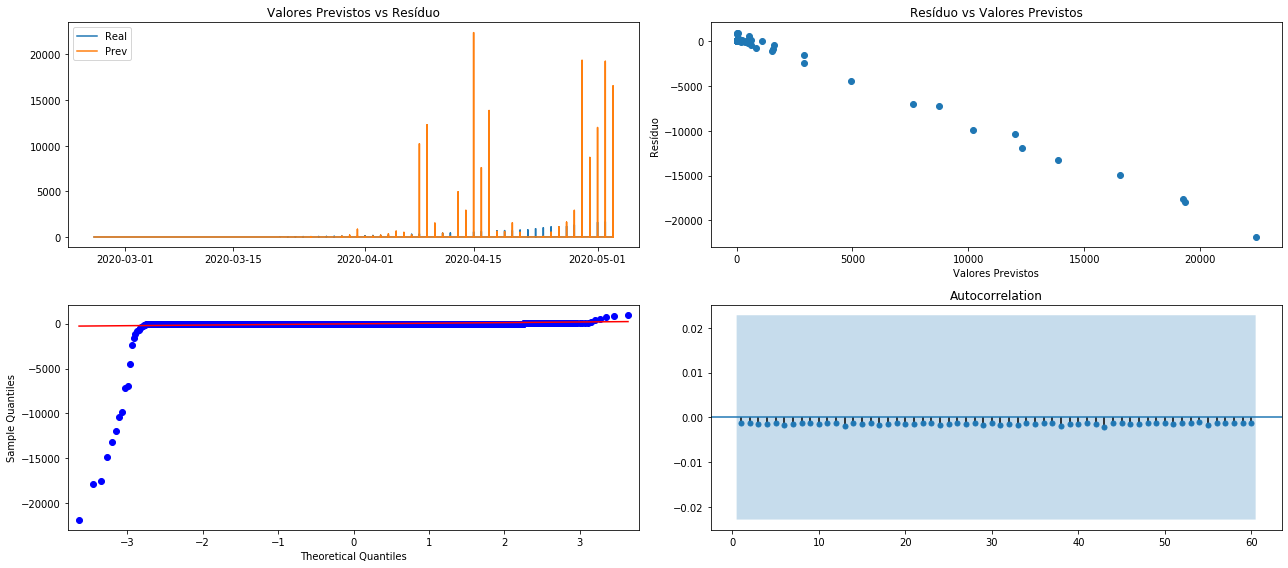

In [408]:
plotar_erro(df_mortes_LR_treino)

Regressão linear sem polinômio:
* Com a base treino, a regressão linear teve desempenho pior que a baseline. O erro médio absoluto foi de 21.5 mortes, contra 0.3 mortes na baseline (que apenas repete o resultado do dia anterior) e o MAPE aponta erro infinito (contra 9.6% na baseline). Analisando os intervalos interquartis, apenas o valor máximo previsto ficou muito discrepante do valor real.


Regressão linear com polinômio potência 2:
*  Com a base treino, a regressão linear teve desempenho semelhante à baseline. O erro médio absoluto ainda ficou um pouco acima da baseline (0.4 contra 0.3), mas o RMSE (que lida melhor com outliers) esteve abaixo (2 contra 4), embora o MAPE continue apontando para o infinito. O R² ajustado alto (93%) dá mostras de overfitting com a base de treino, o que pode ser confirmado comparando os valores reais e previstos dos intervalor interquartis.


Regressão linear com polinômio potência 3:
* Com a base treino, a regressão linear teve desempenho melhor que a baseline pela primeira vez: o erro médio absoluto baixou para 0.03 mortes, e todos os outros indicadores de erros também conseguiram superar a baseline. O R² ajustado alto (95%) dá mostras de overfitting com a base de treino, que pode ser confirmado olhando para as previsões dos intervalos interquartis em comparação com os dados reais.

In [409]:
y_pred2 = LR.predict(x_teste2P)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [410]:
df_mortes_LR_teste = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_LR_teste = df_mortes_LR_teste.iloc[7364:]
df_mortes_LR_teste.reset_index(drop=True, inplace=True)
df_mortes_LR_teste = pd.concat([df_mortes_LR_teste,y_pred2], axis=1, join='inner')
df_mortes_LR_teste.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_LR_teste.rename(columns=colunas, inplace=True)
df_mortes_LR_teste

,real,previsão
data,,
2020-05-04,0,0.00000
2020-05-04,0,0.00000
2020-05-04,11,3.00000
2020-05-04,3,0.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,0,0.00000
2020-05-07,0,0.00000
2020-05-07,2,0.00000


Text(0, 0.5, 'previsão')

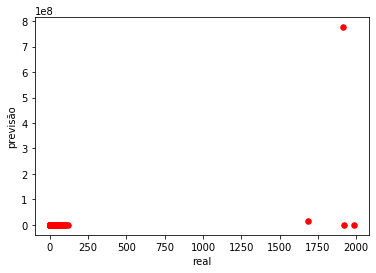

In [411]:
plt.scatter(df_mortes_LR_teste['real'], df_mortes_LR_teste['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [412]:
df_mortes_LR_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,8.34731,552570.24808
std,99.52253,20517411.53960
min,0.00000,-1.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,2.00000,1.00000
max,1986.00000,776014980.00000


Regressão linear sem polinômio:
* Real | Previsto
* mean 	8.34731 	552570.24808
* min: 0.00000 | -1.00000
* 25%: 0.00000 | 0.00000
* 50%: 0.00000 | 0.00000
* 75%: 2.00000 | 1.00000
* max: 1986.00000 | 776014980.00000

Regressão linear com polinômio potência 2:
* Real | Previsto
* mean 	8.34731 	inf
* min: 0.00000 | -1.00000
* 25%: 0.00000 | 0.00000
* 50%: 0.00000 | 0.00000
* 75%: 2.00000 | 1.00000
* max: 1986.00000 | inf

Regressão linear com polinômio potência 3:
* Real | Previsto
* mean 	8.34731 	inf
* min: 0.00000 | -1.00000
* 25%: 0.00000 | 0.00000
* 50%: 0.00000 | 0.00000
* 75%: 2.00000 | 1.00000
* max: 1986.00000 | inf

In [413]:
df_mortes_LR_teste[df_mortes_LR_teste['previsão'] < 0]

,real,previsão
data,,
2020-05-05,1919,-1.00000
2020-05-07,1986,-1.00000


Regressão linear sem polinômio:
* 2 previsões negativas (-1 previsto contra 1919 e 1986 real)

Regressão linear com polinômio potência 2:
* 16 previsões negativas (-1 previsto contra variação entre 23 e 1910)

Regressão linear com polinômio potência 3:
* 238 previsões negativas.

In [414]:
df_mortes_baseline_teste = df_mortes.iloc[7364:]
erro_teste = check_erro(df_mortes_baseline_teste['real'].values,
                         df_mortes_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Regressão Linear ScikitLearn'] = check_erro(df_mortes_LR_teste['real'], df_mortes_LR_teste['previsão'])
erro_teste

,Baseline,Regressão Linear ScikitLearn
Base Teste,,
VIÉS,0.40601,-552561.90077
MSE,44.75681,420973229199271.18750
RMSE,6.69005,20517632.15382
MAE,0.47729,552572.77428
MAPE,6.72089,inf


#### Erro Treino
Regressão linear sem polinômio:
* Baseline | Regressão Linear ScikitLearn
* VIÉS: 0.40601 | -552561.90077
* MSE: 44.75681 | 420973229199271.18750
* RMSE: 6.69005 | 20517632.15382
* MAE: 0.47729 | 552572.77428
* MAPE: 6.72089 | inf

Regressão linear com polinômio potência 2:
* Baseline | Regressão Linear ScikitLearn
* VIÉS: 0.40601 | fora da escala por causa de previsão infinita
* MSE: 44.75681 | fora da escala por causa de previsão infinita
* RMSE: 6.69005 | fora da escala por causa de previsão infinita
* MAE: 0.47729 | fora da escala por causa de previsão infinita
* MAPE: 6.72089 | fora da escala por causa de previsão infinita

Regressão linear com polinômio potência 3:
* Baseline | Regressão Linear ScikitLearn
* VIÉS: 0.40601 | fora da escala por causa de previsão infinita
* MSE: 44.75681 | fora da escala por causa de previsão infinita
* RMSE: 6.69005 | fora da escala por causa de previsão infinita
* MAE: 0.47729 | fora da escala por causa de previsão infinita
* MAPE: 6.72089 | fora da escala por causa de previsão infinita

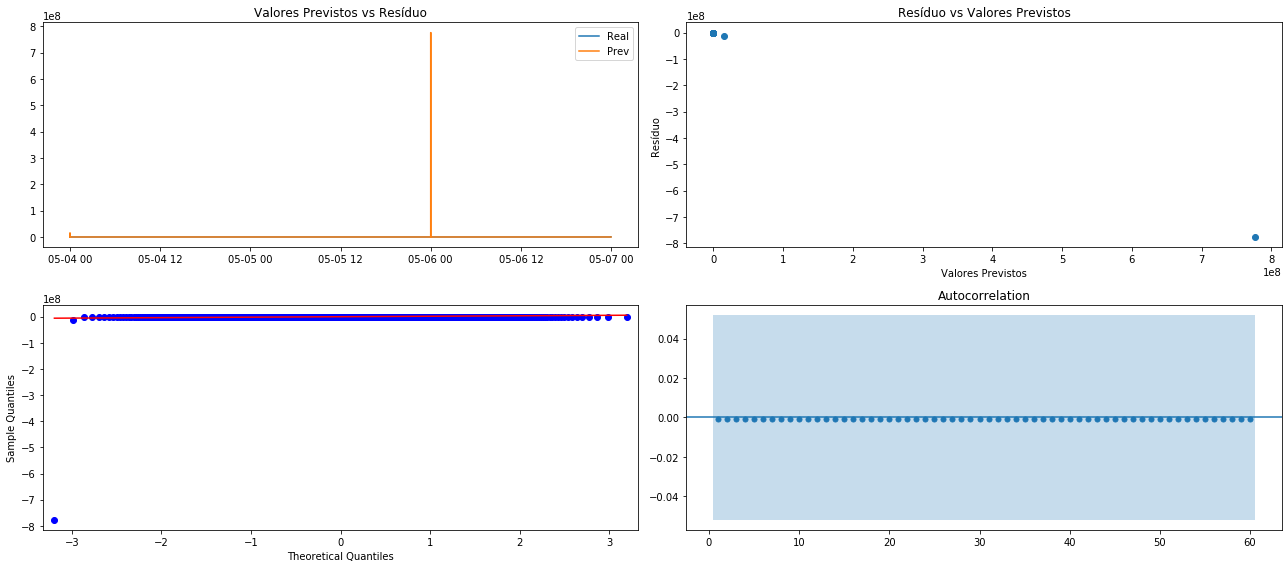

In [415]:
plotar_erro(df_mortes_LR_teste)

Regressão linear sem polinômio:
* Com a base teste, a regressão linear teve desempenho pior que a baseline. O erro médio absoluto foi de 552572 mortes, contra 0.4 mortes na baseline (que apenas repete o resultado do dia anterior) e o MAPE aponta erro infinito (contra 6.7% na baseline). Analisando os intervalos interquartis, apenas o valor máximo previsto ficou muito discrepante do valor real.


Regressão linear com polinômio potência 2:
*  Com a base teste, a regressão linear teve desempenho pior que a baseline. Todos os indicadores de erros explodiram, assim como a diferença entre o valor máximo previsto e real, invalidando o modelo.


Regressão linear com polinômio potência 3:
* Com a base teste, a regressão linear foi ainda pior na comparação com a baseline, com indicadores de erro fora de escala devido à previsão infinita no valor máximo, invalidando o modelo. 


Vamos testar outro método de regressão linear com a biblioteca do StatsModel.

### OLS (Ordinary Least Square)

In [416]:
x_treino2 = expl_mortes[explicativas['dia_do_ano']<125]
x_teste2 = expl_mortes[explicativas['dia_do_ano']>=125]
y_treino2 = target_mortes_log[dados_sel['dia_do_ano']<125]
y_teste2 = target_mortes_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [417]:
x_treino2C = sm.add_constant(x_treino2)

C:\Users\gusta\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [418]:
model = sm.OLS(y_treino2, x_treino2C)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      mortes_acumuladas   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     153.5
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:59:12   Log-Likelihood:                -7554.1
No. Observations:                7364   AIC:                         1.517e+04
Df Residuals:                    7333   BIC:                         1.538e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Vamos eliminar as variáveis com p-valor > 0.05.

In [419]:
expl_mortes2 = expl_norm[['mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos14d',
                          'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos11d',
                          'casos_acumulados_menos7d', 'casos_acumulados_menos4d', 'casos_acumulados_menos3d',
                          'casos_acumulados_menos1d', 'casos_acumulados_menos13d', 'casos_acumulados_menos10d', 
                          'capital_S', 'Hospital/DIA_SUS'
                        ]]

In [420]:
x_treino2 = expl_mortes2[explicativas['dia_do_ano']<125]
x_teste2 = expl_mortes2[explicativas['dia_do_ano']>=125]
y_treino2 = target_mortes_log[dados_sel['dia_do_ano']<125]
y_teste2 = target_mortes_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [421]:
x_treino2C = sm.add_constant(x_treino2)

In [422]:
model = sm.OLS(y_treino2, x_treino2C)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      mortes_acumuladas   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     321.7
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:59:18   Log-Likelihood:                -7588.6
No. Observations:                7364   AIC:                         1.521e+04
Df Residuals:                    7349   BIC:                         1.531e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Vamos eliminar as variáveis com p-valor > 0.05.

In [423]:
expl_mortes2 = expl_norm[['mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos14d',
                          'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos11d',
                          'casos_acumulados_menos7d', 'casos_acumulados_menos3d',
                          'casos_acumulados_menos1d', 'casos_acumulados_menos13d', 'casos_acumulados_menos10d', 
                          'capital_S', 'Hospital/DIA_SUS'
                        ]]

In [424]:
x_treino2 = expl_mortes2[explicativas['dia_do_ano']<125]
x_teste2 = expl_mortes2[explicativas['dia_do_ano']>=125]
y_treino2 = target_mortes_log[dados_sel['dia_do_ano']<125]
y_teste2 = target_mortes_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [425]:
x_treino2C = sm.add_constant(x_treino2)

In [426]:
model = sm.OLS(y_treino2, x_treino2C)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      mortes_acumuladas   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     346.3
Date:                Sat, 15 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:59:24   Log-Likelihood:                -7589.2
No. Observations:                7364   AIC:                         1.521e+04
Df Residuals:                    7350   BIC:                         1.530e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [427]:
y_pred1 = results.predict(x_treino2C)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [428]:
df_mortes_LR_treino = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_LR_treino = df_mortes_LR_treino.iloc[0:7364]
df_mortes_LR_treino = pd.concat([df_mortes_LR_treino,y_pred1], axis=1, join='inner')
df_mortes_LR_treino.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_LR_treino.rename(columns=colunas, inplace=True)
df_mortes_LR_treino

,real,previsão
data,,
2020-02-26,0,0.00000
2020-02-27,0,0.00000
2020-02-28,0,0.00000
2020-02-29,0,0.00000
2020-03-01,0,0.00000
...,...,...
2020-05-03,2,1.00000
2020-05-03,1,0.00000
2020-05-03,0,0.00000


Text(0, 0.5, 'previsão')

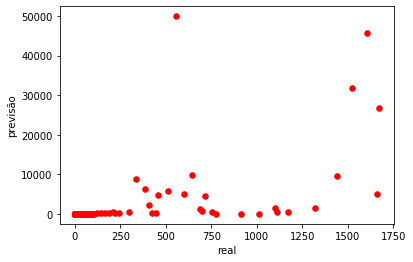

In [429]:
plt.scatter(df_mortes_LR_treino['real'], df_mortes_LR_treino['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [430]:
df_mortes_LR_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,4.98669,31.12873
std,58.68772,957.96082
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1673.00000,49936.00000


In [431]:
df_mortes_LR_treino[df_mortes_LR_treino['previsão'] < 0]

,real,previsão
data,,


In [432]:
erro_treino['Regressão Linear StatsModels OLS'] = check_erro(df_mortes_LR_treino['real'], df_mortes_LR_treino['previsão'])
erro_treino

,Baseline,Regressão Linear ScikitLearn,Regressão Linear StatsModels OLS
Base Treino,,,
VIÉS,0.35646,-17.93590,-26.14204
MSE,16.43061,269773.48832,854682.35741
RMSE,4.05347,519.39724,924.49032
MAE,0.36353,21.56817,29.96985
MAPE,9.64655,inf,inf


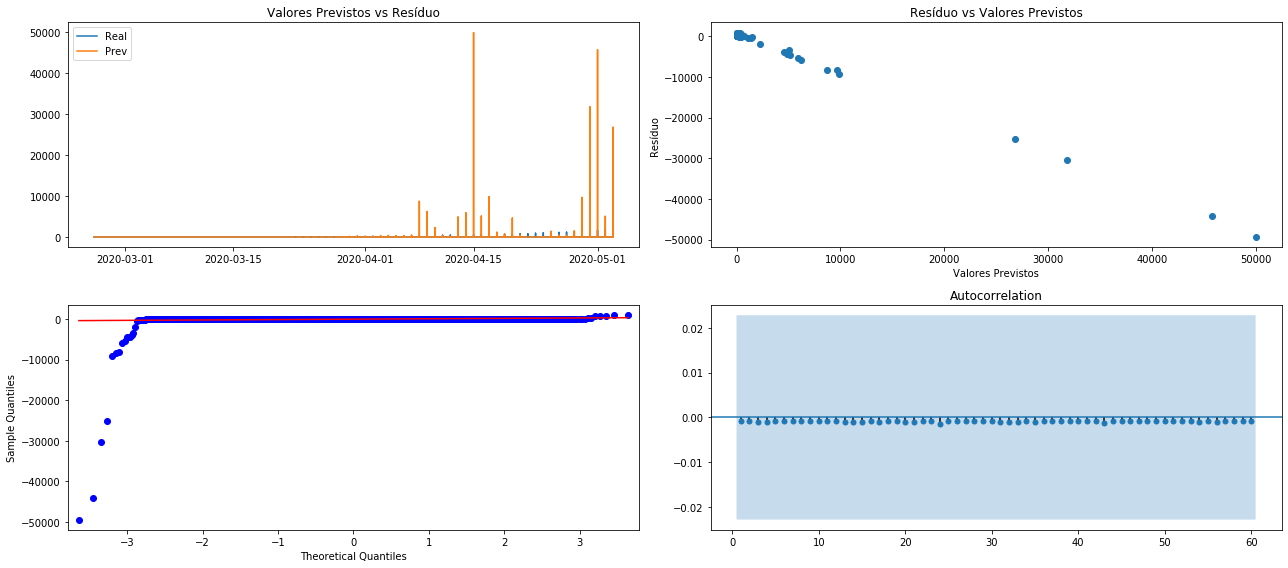

In [433]:
plotar_erro(df_mortes_LR_treino)

Utilizando o StatsModel, conseguimos ter acesso ao p-valor, e com isso, excluímos algumas variáveis. Ainda assim, as métricas de erro pioraram em relação ao modelo do scikitlearn com todas as variáveis.

In [434]:
x_teste2C = sm.add_constant(x_teste2)

C:\Users\gusta\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [435]:
y_pred2 = results.predict(x_teste2C)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [436]:
df_mortes_LR_teste = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_LR_teste = df_mortes_LR_teste.iloc[7364:]
df_mortes_LR_teste = pd.concat([df_mortes_LR_teste,y_pred2], axis=1, join='inner')
df_mortes_LR_teste.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_LR_teste.rename(columns=colunas, inplace=True)
df_mortes_LR_teste

,real,previsão
data,,
2020-05-04,0,0.00000
2020-05-04,0,0.00000
2020-05-04,11,2.00000
2020-05-04,3,0.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,0,0.00000
2020-05-07,0,0.00000
2020-05-07,2,0.00000


Text(0, 0.5, 'previsão')

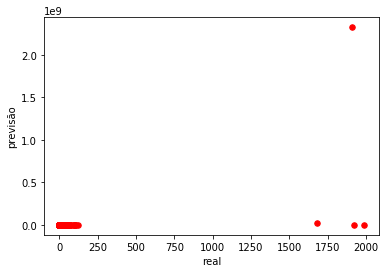

In [437]:
plt.scatter(df_mortes_LR_teste['real'], df_mortes_LR_teste['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [438]:
df_mortes_LR_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,8.34731,1638747.46331
std,99.52253,61503649.34658
min,0.00000,-1.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,2.00000,1.00000
max,1986.00000,2326533822.00000


In [439]:
df_mortes_LR_teste[df_mortes_LR_teste['previsão']<0]

,real,previsão
data,,
2020-05-07,1986,-1.00000


In [440]:
erro_teste['Regressão Linear StatsModel OLS'] = check_erro(df_mortes_LR_teste['real'], df_mortes_LR_teste['previsão'])
erro_teste

,Baseline,Regressão Linear ScikitLearn,Regressão Linear StatsModel OLS
Base Teste,,,
VIÉS,0.40601,-552561.90077,-1638739.11600
MSE,44.75681,420973229199271.18750,3782734726619824.50000
RMSE,6.69005,20517632.15382,61503940.74057
MAE,0.47729,552572.77428,1638749.25157
MAPE,6.72089,inf,inf


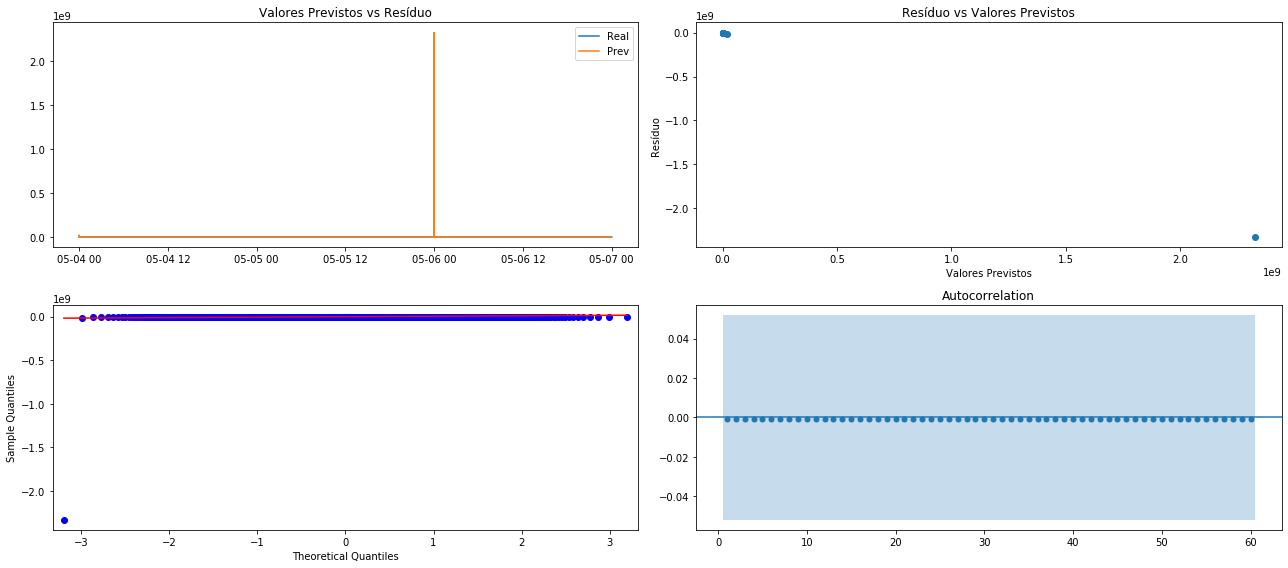

In [441]:
plotar_erro(df_mortes_LR_teste)

Com a base teste, a regressão linear do StatsModel sem as variáveis com p-valor > 0.05 teve resultados piores em relação aos que tivemos com a regressão linear do ScikitLearn. A baseline continua sendo o melhor resultado.